# 言語処理100本ノック　第5章 係り受け解析

## 40. 係り受け解析結果の読み込み（形態素）
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

ヒント：https://nlp100.github.io/data/ai.ja.zip からデータをダウンロードする．

In [46]:
class Morph:   #クラスを定義
    def __init__(self,morph):   #コンストラクタで行う処理。selfはインスタンス自身。引数は複数設定できる。
        surface,attr=morph.split('\t')   #A,B=C.split():A=C[0],B=C[1]
        attr=attr.split(',')
        self.surface=surface
        self.base=attr[6]
        self.pos=attr[0]
        self.pos1=attr[1]

filename = './ai.ja.txt.parsed'

sentences = []
morphs = []
ans=[]
with open(filename, mode='r') as f:
    for line in f:
        #print(line)
        if line[0] == '*':  # 係り受け関係を表す行：スキップ
            continue
        elif line != 'EOS\n':  # 文末以外：Morphを適用し形態素リストに追加
            morphs.append(Morph(line))
        else:  # 文末：形態素リストを文リストに追加
            sentences.append(morphs)
            morphs = []
    for sentence in sentences:   #空白行を削除
        if sentence==[]:
            continue
        else:
            ans.append(sentence)


for m in ans[1]:
    print(vars(m))   #vars:引数のオブジェクトのdict属性を返す


{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*\n', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': '*\n', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{

## 41. 係り受け解析結果の読み込み（文節・係り受け）
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．

In [50]:
class Morph:
    def __init__(self,morph):
        surface,attr=morph.split('\t')
        attr=attr.split(',')
        self.surface=surface
        self.base=attr[6]
        self.pos=attr[0]
        self.pos1=attr[1]

class Chunk:
    def __init__(self,morphs,dst):
        self.morphs=morphs
        self.dst=dst   #係り先文節インデックス番号
        self.srcs=[]   #係り元文節インデックス番号（係られている相手の文節番号）
        
class Sentence:
    def __init__(self,chunks):
        self.chunks=chunks
        for i,chunk in enumerate(self.chunks):   #enummerate():forループの中でリストやタプルなどのイテラブルなオブジェクトの要素と同時にインデックス番号を取得できる
            if chunk.dst!=-1:   #chunk.dst=-1:係り先なしの文節
                self.chunks[chunk.dst].srcs.append(i)
                #chunk'A'の係り先のchunk'B'のsrcにchunk'A'の文節番号を追加



filename = './ai.ja.txt.parsed'

sentences = []
chunks=[]
morphs = []
ans=[]
with open(filename, mode='r') as f:
    for line in f:
        #print(line)
        if line[0]=='*':
            if len(morphs)>0:   #形態素が空でない時
                chunks.append(Chunk(morphs,dst))
                morphs=[]
            dst=int(line.split(' ')[2].rstrip('D'))
        elif line!='EOS\n':
            morphs.append(Morph(line))
        else:
            chunks.append(Chunk(morphs,dst))
            sentences.append(Sentence(chunks))
            morphs=[]
            chunks=[]
            dst=-1
    for sentence in sentences:
        for chunks in sentence.chunks:
            if chunks.morphs==[]:
                continue
            else:
                ans.append(sentence)


for chunk in ans[1].chunks:   #ans:sentences,ans[]:sentence,ans[].chunks:chunks
    print([morph.surface for morph in chunk.morphs], chunk.dst, chunk.srcs)



['人工', '知能'] 17 []
['（', 'じん', 'こうち', 'のう', '、', '、'] 17 []
['AI'] 3 []
['〈', 'エーアイ', '〉', '）', 'と', 'は', '、'] 17 [2]
['「', '『', '計算'] 5 []
['（', '）', '』', 'という'] 9 [4]
['概念', 'と'] 9 []
['『', 'コンピュータ'] 8 []
['（', '）', '』', 'という'] 9 [7]
['道具', 'を'] 10 [5, 6, 8]
['用い', 'て'] 12 [9]
['『', '知能', '』', 'を'] 12 []
['研究', 'する'] 13 [10, 11]
['計算', '機', '科学'] 14 [12]
['（', '）', 'の'] 15 [13]
['一', '分野', '」', 'を'] 16 [14]
['指す'] 17 [15]
['語', '。'] 34 [0, 1, 3, 16]
['「', '言語', 'の'] 20 []
['理解', 'や'] 20 []
['推論', '、'] 21 [18, 19]
['問題', '解決', 'など', 'の'] 22 [20]
['知的', '行動', 'を'] 24 [21]
['人間', 'に'] 24 []
['代わっ', 'て'] 26 [22, 23]
['コンピューター', 'に'] 26 []
['行わ', 'せる'] 27 [24, 25]
['技術', '」', '、', 'または', '、'] 34 [26]
['「', '計算', '機'] 29 []
['（', 'コンピュータ', '）', 'による'] 31 [28]
['知的', 'な'] 31 []
['情報処理', 'システム', 'の'] 33 [29, 30]
['設計', 'や'] 33 []
['実現', 'に関する'] 34 [31, 32]
['研究', '分野', '」', 'と', 'も'] 35 [17, 27, 33]
['さ', 'れる', '。'] -1 [34]


## 42. 係り元と係り先の文節の表示
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [53]:
sentence=ans[1]
for chunk in sentence.chunks:
    if int(chunk.dst)!=-1:
        modifier=''.join([morph.surface if morph.pos!='記号' else '' for morph in chunk.morphs])   #join()の中身：記号以外のmorph.surfaceのリストを作成
        #'間に挿入する文字列'.join([連結したい文字列のリスト])
        modifiee=''.join([morph.surface if morph.pos!='記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs])
        #modifier:修飾子（係り元）
        #modifiee:係り先
        
    print(modifier,modifiee,sep='\t')   #sep='\t':タブで区切る



人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される
研究分野とも	される


## 43. 名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [54]:
for chunk in sentence.chunks:
    if int(chunk.dst)!=-1:
        modifier=''.join([morph.surface if morph.pos!='記号' else '' for morph in chunk.morphs])
        modifier_pos=[morph.pos for morph in chunk.morphs]
        modifiee=''.join([morph.surface if morph.pos!='記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs])
        modifiee_pos=[morph.pos for morph in sentence.chunks[int(chunk.dst)].morphs]
    
    if '名詞' in modifier_pos and '動詞' in modifiee_pos:
        print(modifier,modifiee,sep='\t')
    

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される
研究分野とも	される


## 44. 係り受け木の可視化
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい．

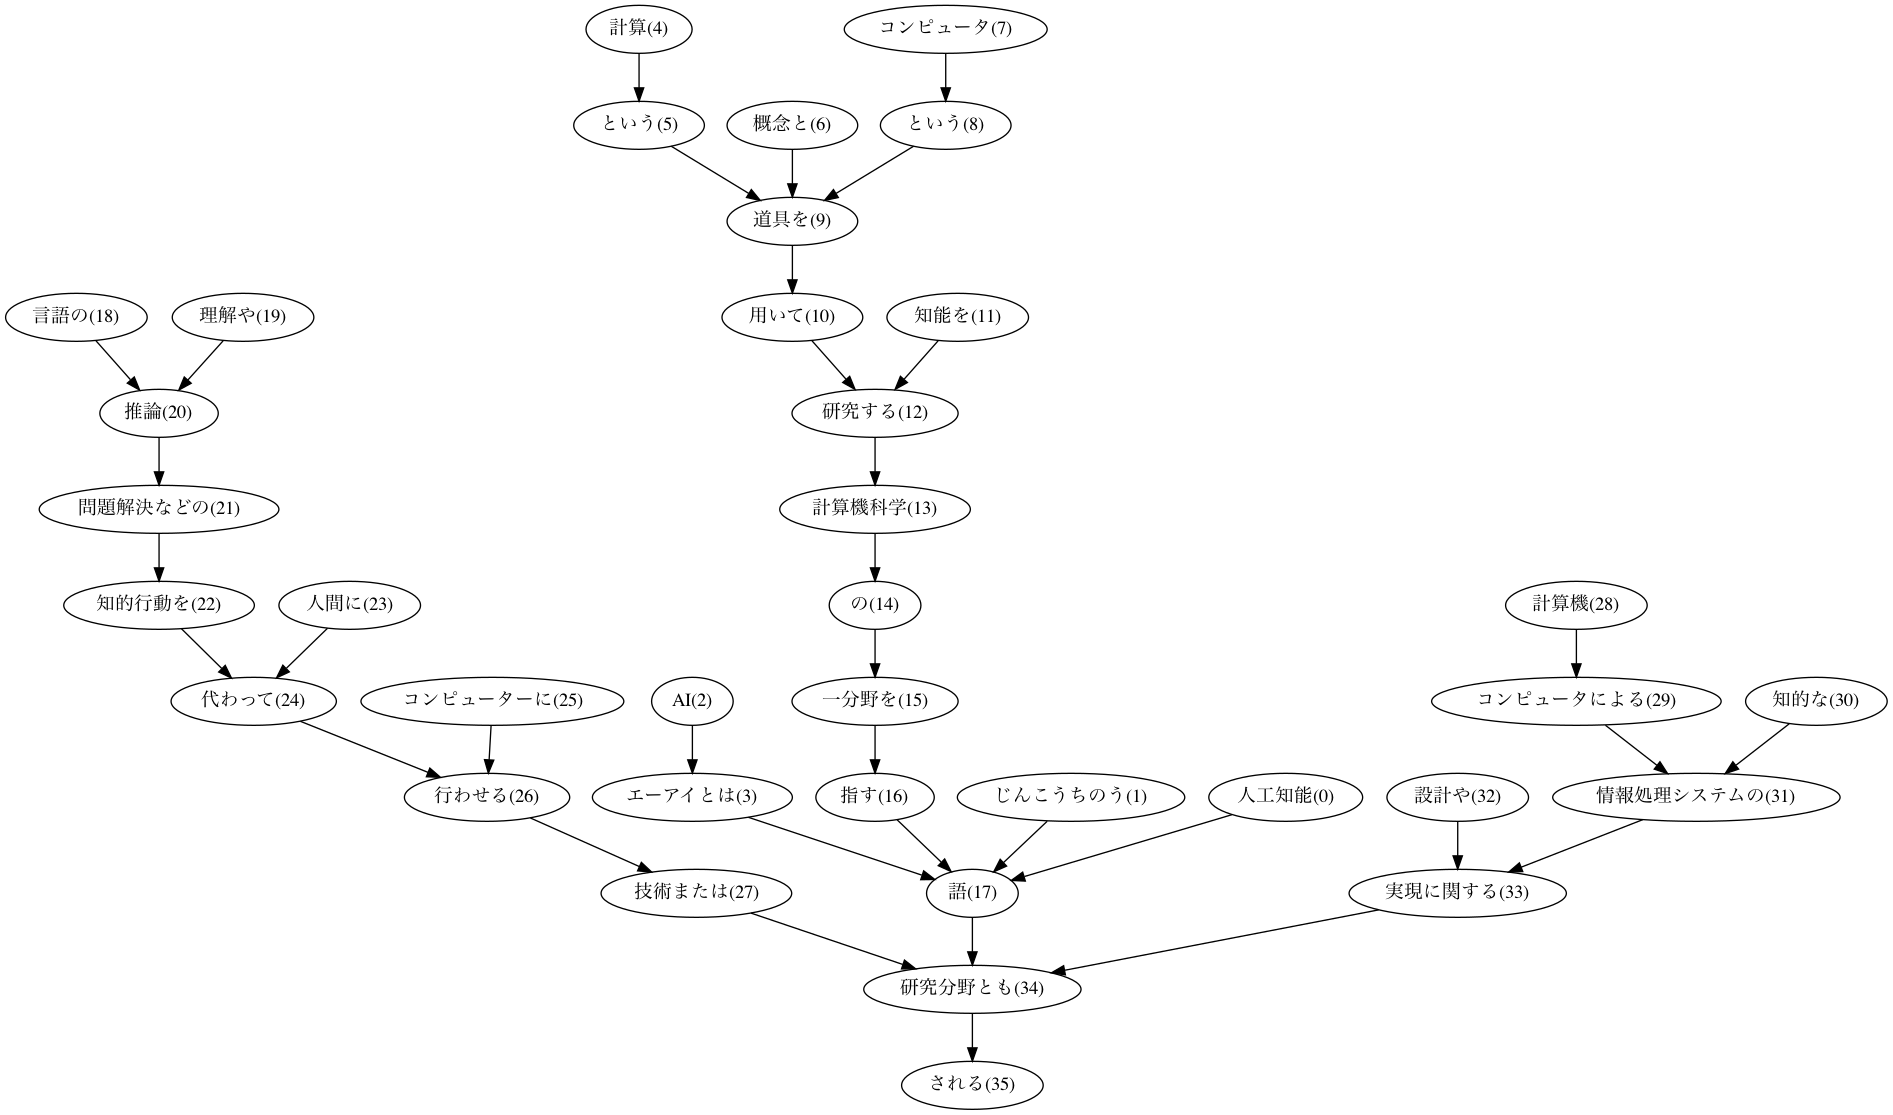

In [60]:
import pydot
from IPython.display import Image,display_png
from graphviz import Digraph

edges=[]
for id,chunk in enumerate(sentence.chunks):   #同じ文節があると区別がつかないためidを末尾に追加
    if int(chunk.dst)!=-1:
        modifier=''.join([morph.surface if morph.pos!='記号' else '' for morph in chunk.morphs]+['('+str(id)+')'])
        modifiee=''.join([morph.surface if morph.pos!='記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs]+['('+str(chunk.dst)+')'])
        edges.append([modifier,modifiee])
        

n=pydot.Node('node')   #?
n.fontname='IPAGothic'
g=pydot.graph_from_edges(edges,directed=True)   #directed=Trueとすると有向グラフになる
g.add_node(n)
g.write_png('./ans44.png')
display_png(Image('./ans44.png'))

## 45. 動詞の格パターンの抽出
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．  

動詞を含む文節において，最左の動詞の基本形を述語とする
述語に係る助詞を格とする  
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる  
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．  


```
作り出す    で は を
```

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．  

- コーパス中で頻出する述語と格パターンの組み合わせ
- 「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）


In [70]:
with open('./ans45.txt','w') as f:
    for sentence in ans:
        for chunk in sentence.chunks:
            for morph in chunk.morphs:
                if morph.pos=='動詞':
                    cases=[]
                    for src in chunk.srcs:
                        cases=cases+[morph.surface for morph in sentence.chunks[src].morphs if morph.pos=='助詞']
                        #動詞にかかっている助詞を見つけ、リスト化
                    if len(cases)>0:
                        cases=sorted(list(set(cases)))   #辞書順にソート
                        #sorted():ソートした新しいリストを作成
                        #set()で集合にして重複を回避したのちlist()でリスト化
                        line='{}\t{}'.format(morph.base,' '.join(cases))
                        #'{}\t{}.format():{}が置換可能、\tはタブ
                        print(line,file=f)   #ans45.txtに書き込み
                    break
with open('./ans45.txt','r') as f:
    for line in f:
        print(line)


用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て に

する	と も

用いる	を

する	て を

指す	を

代わる	に を

行う	て


する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が て として は

繰り返す	を

する	と を

基づく	に

する	と

ある	が

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

示す	で に は を

する	を

示す	て は を

する	は を

する	は を

示す	を

呼ぶ	と

ある	は も

する	に を

する	を

する	に を

する	を

する	に を

する	を

する	に を

する	を

する	に を

する	を

する	に を

する	を

する	に を

する	を

する	に を


行う	て に を

する	に を

する	を

含む	に は も

分かる	から が

する	が に

見合う	に

見出せる	が

する	から が て にとって は も

する	が に は

適す	に

する	から に対して を

行う	を

する	が

行う	に により を

する	が

する	に を

行う	て に を

する	に を

する	を

含む	に は も

分かる	から が

する	が に

見合う	に

見出せる	が

する	から が て にとって は も

する	が に は

適す	に

する	から に対して を

行う	を

する	が

行う	に により を

する	が

する	に を

行う	て に を

する	に を

する	を

含む	に は も

分かる	から が

する	が に

見合う	に

見出せる	が

する	から が て にとって は も

する	が に は

適す	に

する	から に対して を

行う	を

する	が

行う	に により を

する	が

する	に を

行う	て に を

する	に を

する	を

含む	に は も

分かる	から が

する	が に

見合う	に

見出せる	が

する	から が て にとって は も

する	が に は

適す	に

する	から に対して を

行う	を

する	が

行う	に により を

する	が

する	に を

行う	て に を

する	に を

する	を

含む	に は も

分かる	から が

する	が に

見合う	に

見出せる	が

する	から が て にとって は も

する	が に は

適す	に

する	から に対して を

行う	を

する	が

行う	に により を

する	が

する	に を

行う	て に を

する	に を

する	を

含む	に は も

分かる	から が

する	が に

見合う	に

見出せる	が

する	から が て にとって は も

する	が に は

適す	に

する	から に対して を

行う	を

する	が

行う	に により を

する	が

する	に を

行う	て に を

する	に を

する	を

含む	に は も

分かる	から が

する	が に

見合う	に

見出せる	が

する

用いる	を

する	を

する	て

する	を

迎える	が に を

合わせる	に

増やす	て で に も を

する	に を

する	が

用いる	から として にかけて

する	を

する	が に

用いる	を

する	を

する	て

する	を

迎える	が に を

合わせる	に

増やす	て で に も を

する	に を

する	が

用いる	から として にかけて

する	を

する	が に

用いる	を

する	を

する	て

する	を

迎える	が に を

合わせる	に

増やす	て で に も を

する	に を

する	が

用いる	から として にかけて

する	を

する	が に

用いる	を

する	を

する	て

する	を

迎える	が に を

合わせる	に

増やす	て で に も を

する	に を

する	が

用いる	から として にかけて

する	を

する	が に

用いる	を

する	を

する	て

する	を

迎える	が に を

合わせる	に

増やす	て で に も を

する	に を

する	が

用いる	から として にかけて

する	を

する	が に

用いる	を

する	を

する	て

する	を

迎える	が に を

合わせる	に

増やす	て で に も を

する	に を

する	が

用いる	から として にかけて

する	を

する	が に

用いる	を

する	を

する	て

する	を

迎える	が に を

合わせる	に

増やす	て で に も を

する	に を

する	が

用いる	から として にかけて

する	を

する	が に

用いる	を

する	を

する	て

する	を

迎える	が に を

合わせる	に

増やす	て で に も を

する	に を

する	が

用いる	から として にかけて

する	を

する	が に

用いる	を

する	を

する	て

する	を

迎える	が に を

合わせる	に

増やす	て で に も を

する	に を

する	が

用いる	から として にかけて

する	を

する	が に

用いる	を

する	を

する	て

する	を

迎える	が に を

合わせる	に

増やす	て で に も を

する	に 


関わる	に も

集める	から は を

選ぶ	が で

する	を

する	を

する	を

する	て で

する	に も

巻き起こす	だけ て に は を

受ける	を

用いる	て も を

する	を

売る	の

用いる	が として に は まで

する	が て で として は

持つ	から が

活かす	に を

する	を

漕ぎ着ける	に

する	で も より

基づく	に

する	て に を

する	が という に も

関わる	に も

集める	から は を

選ぶ	が で

する	を

する	を

する	を

する	て で

する	に も

巻き起こす	だけ て に は を

受ける	を

用いる	て も を

する	を

売る	の

用いる	が として に は まで

する	が て で として は

持つ	から が

活かす	に を

する	を

漕ぎ着ける	に

する	で も より

基づく	に

する	て に を

する	が という に も

関わる	に も

集める	から は を

選ぶ	が で

する	を

する	を

する	を

する	て で

する	に も

巻き起こす	だけ て に は を

受ける	を

用いる	て も を

する	を

売る	の

用いる	が として に は まで

する	が て で として は

持つ	から が

活かす	に を

する	を

漕ぎ着ける	に

する	で も より

基づく	に

する	て に を

する	が という に も

関わる	に も

集める	から は を

選ぶ	が で

する	を

する	を

する	を

する	て で

する	に も

巻き起こす	だけ て に は を

受ける	を

用いる	て も を

する	を

売る	の

用いる	が として に は まで

する	が て で として は

持つ	から が

活かす	に を

する	を

漕ぎ着ける	に

する	で も より

基づく	に

する	て に を

する	が という に も

関わる	に も

集める	から は を

選ぶ	が で

する	を

する	を

する	を

する	て で

する	に も

巻き起こす	だけ て に は を

受ける	を

用いる	て も を

する	を

売る	の

用いる	が とし

する	を

する	を

する	て で

する	に も

巻き起こす	だけ て に は を

受ける	を

用いる	て も を

する	を

売る	の

用いる	が として に は まで

する	が て で として は

持つ	から が

活かす	に を

する	を

漕ぎ着ける	に

する	で も より

基づく	に

する	て に を

する	が という に も

関わる	に も

集める	から は を

選ぶ	が で

する	を

する	を

する	を

する	て で

する	に も

巻き起こす	だけ て に は を

受ける	を

用いる	て も を

する	を

売る	の

用いる	が として に は まで

する	が て で として は

持つ	から が

活かす	に を

する	を

漕ぎ着ける	に

する	で も より

基づく	に

する	て に を

する	が という に も

関わる	に も

集める	から は を

選ぶ	が で

する	を

する	を

する	を

する	て で

する	に も

巻き起こす	だけ て に は を

受ける	を

用いる	て も を

する	を

売る	の

用いる	が として に は まで

する	が て で として は

持つ	から が

活かす	に を

する	を

漕ぎ着ける	に

する	で も より

基づく	に

する	て に を

する	が という に も

関わる	に も

集める	から は を

選ぶ	が で

する	を

する	を

する	を

する	て で

する	に も

巻き起こす	だけ て に は を

受ける	を

用いる	て も を

する	を

売る	の

用いる	が として に は まで

する	が て で として は

持つ	から が

活かす	に を

する	を

漕ぎ着ける	に

する	で も より

基づく	に

する	て に を

する	が という に も

関わる	に も

集める	から は を

選ぶ	が で

する	を

する	を

する	を

する	て で

する	に も

巻き起こす	だけ て に は を

受ける	を

用いる	て も を

する	を

売る	の

用いる	が として に は まで

する	が て で として は

持つ	から が

活


持つ	が を

なる	は

ある	が

する	と

なる	が と

抑える	を

できる	ながら を

ある	が て は

関わる	に も

する	から を

迎える	で を

与える	が に

ある	が として に は も

する	で に を

持つ	が を

なる	は

ある	が

する	と

なる	が と

抑える	を

できる	ながら を

ある	が て は

関わる	に も

する	から を

迎える	で を

与える	が に

ある	が として に は も

する	で に を

持つ	が を

なる	は

ある	が

する	と

なる	が と

抑える	を

できる	ながら を

ある	が て は

関わる	に も

する	から を

迎える	で を

与える	が に

ある	が として に は も

する	で に を

持つ	が を

なる	は

ある	が

する	と

なる	が と

抑える	を

できる	ながら を

ある	が て は

関わる	に も

する	から を

迎える	で を

与える	が に

ある	が として に は も

する	で に を

持つ	が を

なる	は

ある	が

する	と

なる	が と

抑える	を

できる	ながら を

ある	が て は

関わる	に も

する	から を

迎える	で を

与える	が に

ある	が として に は も

する	で に を

持つ	が を

なる	は

ある	が

する	と

なる	が と

抑える	を

できる	ながら を

ある	が て は

関わる	に も

する	から を

迎える	で を

与える	が に

ある	が として に は も

する	で に を

持つ	が を

なる	は

ある	が

する	と

なる	が と

抑える	を

できる	ながら を

ある	が て は

関わる	に も

する	から を

迎える	で を

与える	が に

ある	が として に は も

する	で に を

持つ	が を

なる	は

ある	が

する	と

なる	が と

抑える	を

できる	ながら を

ある	が て は

関わる	に も

する	から を

迎える	で を

与える	が に

ある	が として に は も

する	で に を

持つ	が を


する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に

する	に は

行う	から

向ける	に

進む	が に において

する	が で

留まる	に




持つ	を

受け止める	て は

受ける	を

する	を

立つ	が て に において は

する	を

する	て

組み合わせる	を

する	て で と は

扱う	のみ を

進む	から

扱う	を

する	が て として

なる	と

付ける	で に を

する	が て に により

集める	に を

持つ	を

受け止める	て は

受ける	を

する	を

立つ	が て に において は

する	を

する	て

組み合わせる	を

する	て で と は

扱う	のみ を

進む	から

扱う	を

する	が て として

なる	と

付ける	で に を

する	が て に により

集める	に を

持つ	を

受け止める	て は

受ける	を

する	を

立つ	が て に において は

する	を

する	て

組み合わせる	を

する	て で と は

扱う	のみ を

進む	から

扱う	を

する	が て として

なる	と

付ける	で に を

する	が て に により

集める	に を

持つ	を

受け止める	て は

受ける	を

する	を

立つ	が て に において は

する	を

する	て

組み合わせる	を

する	て で と は

扱う	のみ を

進む	から

扱う	を

する	が て として

なる	と

付ける	で に を

する	が て に により

集める	に を

持つ	を

受け止める	て は

受ける	を

する	を

立つ	が て に において は

する	を

する	て

組み合わせる	を

する	て で と は

扱う	のみ を

進む	から

扱う	を

する	が て として

なる	と

付ける	で に を

する	が て に により

集める	に を

持つ	を

受け止める	て は

受ける	を

する	を

立つ	が て に において は

する	を

する	て

組み合わせる	を

する	て で と は

扱う	のみ を

進む	から

扱う	を

する	が て として

なる	と

付ける	で に を

する	が て に により

集める	に を

持つ	を

受け止める	て は

受ける	を

する	を

立つ	が て に において は

する	を

する	て

組み合わせる	を



入る	が で に

する	が

寄せる	が に を

行う	で に を

する	が て

する	が として に

関わる	に も

できる	に を

する	が て

受ける	を

目立つ	から が て で も

入る	が で に

する	が

寄せる	が に を

行う	で に を

する	が て

する	が として に

関わる	に も

できる	に を

する	が て

受ける	を

目立つ	から が て で も

入る	が で に

する	が

寄せる	が に を

行う	で に を

する	が て

する	が として に

関わる	に も

できる	に を

する	が て

受ける	を

目立つ	から が て で も

入る	が で に

する	が

寄せる	が に を

行う	で に を

する	が て

する	が として に

関わる	に も

できる	に を

する	が て

受ける	を

目立つ	から が て で も

入る	が で に

する	が

寄せる	が に を

行う	で に を

する	が て

する	が として に

関わる	に も

できる	に を

する	が て

受ける	を

目立つ	から が て で も

入る	が で に

する	が

寄せる	が に を

行う	で に を

する	が て

する	が として に

関わる	に も

できる	に を

する	が て

受ける	を

目立つ	から が て で も

入る	が で に

する	が

寄せる	が に を

行う	で に を

する	が て

する	が として に

関わる	に も

できる	に を

する	が て

受ける	を

目立つ	から が て で も

入る	が で に

する	が

寄せる	が に を

行う	で に を

する	が て

する	が として に

関わる	に も

できる	に を

する	が て

受ける	を

目立つ	から が て で も

入る	が で に

する	が

寄せる	が に を

行う	で に を

する	が て

する	が として に

関わる	に も

できる	に を

する	が て

受ける	を

目立つ	から が て で も

入る	が で に

する	が

寄せる	が に を

行う	で に を

する	が て

す

取り上げる	が て など は ば

位置づける	から に を

上げる	として も

する	で は を

集める	を

投じる	て で と に は

よる	など に や

する	と

する	を

ある	て で に は

する	て と ば も

する	で を

する	が において も

する	て を

占める	が

する	て と は も

よる	に

超える	を

なる	から が て で と は

する	が て で も を

ある	でも

握る	が で を

する	つつ と

著す	を

取り上げる	が て など は ば

位置づける	から に を

上げる	として も

する	で は を

集める	を

投じる	て で と に は

よる	など に や

する	と

する	を

ある	て で に は

する	て と ば も

する	で を

する	が において も

する	て を

占める	が

する	て と は も

よる	に

超える	を

なる	から が て で と は

する	が て で も を

ある	でも

握る	が で を

する	つつ と

著す	を

取り上げる	が て など は ば

位置づける	から に を

上げる	として も

する	で は を

集める	を

投じる	て で と に は

よる	など に や

する	と

する	を

ある	て で に は

する	て と ば も

する	で を

する	が において も

する	て を

占める	が

する	て と は も

よる	に

超える	を

なる	から が て で と は

する	が て で も を

ある	でも

握る	が で を

する	つつ と

著す	を

取り上げる	が て など は ば

位置づける	から に を

上げる	として も

する	で は を

集める	を

投じる	て で と に は

よる	など に や

する	と

する	を

ある	て で に は

する	て と ば も

する	で を

する	が において も

する	て を

占める	が

する	て と は も

よる	に

超える	を

なる	から が て で と は

する	が て で も を

ある	でも

握る	が で を

する	つつ と

著す	を

取り上げる	が て など は ば

する	を

ある	て で に は

する	て と ば も

する	で を

する	が において も

する	て を

占める	が

する	て と は も

よる	に

超える	を

なる	から が て で と は

する	が て で も を

ある	でも

握る	が で を

する	つつ と

著す	を

取り上げる	が て など は ば

位置づける	から に を

上げる	として も

する	で は を

集める	を

投じる	て で と に は

よる	など に や

する	と

する	を

ある	て で に は

する	て と ば も

する	で を

する	が において も

する	て を

占める	が

する	て と は も

よる	に

超える	を

なる	から が て で と は

する	が て で も を

ある	でも

握る	が で を

する	つつ と

著す	を

取り上げる	が て など は ば

位置づける	から に を

上げる	として も

する	で は を

集める	を

投じる	て で と に は

よる	など に や

する	と

する	を

ある	て で に は

する	て と ば も

する	で を

する	が において も

する	て を

占める	が

する	て と は も

よる	に

超える	を

なる	から が て で と は

する	が て で も を

ある	でも

握る	が で を

する	つつ と

著す	を

取り上げる	が て など は ば

位置づける	から に を

上げる	として も

する	で は を

集める	を

投じる	て で と に は

よる	など に や

する	と

する	を

ある	て で に は

する	て と ば も

する	で を

する	が において も

する	て を

占める	が

する	て と は も

よる	に

超える	を

なる	から が て で と は

する	が て で も を

ある	でも

握る	が で を

する	つつ と

著す	を

取り上げる	が て など は ば

位置づける	から に を

上げる	として も

する	で は を

集める	を

投じる	て で と に は

よる	など に や

する	と

する	を

ある	て で に は

する	に を

行う	が で は

する	から など

する	で

する	で を

経る	を

犯す	で に も を

ある	が

する	て で として に は

する	て と

報じる	が

使う	を

送る	が に を

なる	て として に は

恐れる	を

起きる	が

する	を

する	が て で と に は

する	に は を

する	が も を通じて

する	が に

する	から が て など

併せ持つ	を

する	が で

変わる	が は

述べる	と

呼ぶ	と

する	が で を

鳴らす	て に は を

する	に

する	で を

呼ぶ	て と など は を

埋め込む	に

する	から で を

推し進める	が

行う	に まで を

する	に を

行う	が で は

する	から など

する	で

する	で を

経る	を

犯す	で に も を

ある	が

する	て で として に は

する	て と

報じる	が

使う	を

送る	が に を

なる	て として に は

恐れる	を

起きる	が

する	を

する	が て で と に は

する	に は を

する	が も を通じて

する	が に

する	から が て など

併せ持つ	を

する	が で

変わる	が は

述べる	と

呼ぶ	と

する	が で を

鳴らす	て に は を

する	に

する	で を

呼ぶ	て と など は を

埋め込む	に

する	から で を

推し進める	が

行う	に まで を

する	に を

行う	が で は

する	から など

する	で

する	で を

経る	を

犯す	で に も を

ある	が

する	て で として に は

する	て と

報じる	が

使う	を

送る	が に を

なる	て として に は

恐れる	を

起きる	が

する	を

する	が て で と に は

する	に は を

する	が も を通じて

する	が に

する	から が て など

併せ持つ	を

する	が で

変わる	が は

述べる	と

呼ぶ	と

する	が で を

鳴らす	て に は を

する	に

する	で を

呼ぶ	て と など は を

埋め込む	に

する	から で を

推し進める	が



する	が も を通じて

する	が に

する	から が て など

併せ持つ	を

する	が で

変わる	が は

述べる	と

呼ぶ	と

する	が で を

鳴らす	て に は を

する	に

する	で を

呼ぶ	て と など は を

埋め込む	に

する	から で を

推し進める	が

行う	に まで を

する	に を

行う	が で は

する	から など

する	で

する	で を

経る	を

犯す	で に も を

ある	が

する	て で として に は

する	て と

報じる	が

使う	を

送る	が に を

なる	て として に は

恐れる	を

起きる	が

する	を

する	が て で と に は

する	に は を

する	が も を通じて

する	が に

する	から が て など

併せ持つ	を

する	が で

変わる	が は

述べる	と

呼ぶ	と

する	が で を

鳴らす	て に は を

する	に

する	で を

呼ぶ	て と など は を

埋め込む	に

する	から で を

推し進める	が

行う	に まで を

する	に を

行う	が で は

する	から など

する	で

する	で を

経る	を

犯す	で に も を

ある	が

する	て で として に は

する	て と

報じる	が

使う	を

送る	が に を

なる	て として に は

恐れる	を

起きる	が

する	を

する	が て で と に は

する	に は を

する	が も を通じて

する	が に

する	から が て など

併せ持つ	を

する	が で

変わる	が は

述べる	と

呼ぶ	と

する	が で を

鳴らす	て に は を

する	に

する	で を

呼ぶ	て と など は を

埋め込む	に

する	から で を

推し進める	が

行う	に まで を

する	に を

行う	が で は

する	から など

する	で

する	で を

経る	を

犯す	で に も を

ある	が

する	て で として に は

する	て と

報じる	が

使う	を

送る	が に を

なる	て として に は

恐れる	を

起きる	が

する	を

する	が て で と に は



恐れる	を

起きる	が

する	を

する	が て で と に は

する	に は を

する	が も を通じて

する	が に

する	から が て など

併せ持つ	を

する	が で

変わる	が は

述べる	と

呼ぶ	と

する	が で を

鳴らす	て に は を

する	に

する	で を

呼ぶ	て と など は を

埋め込む	に

する	から で を

推し進める	が

行う	に まで を

する	に を

行う	が で は

する	から など

する	で

する	で を

経る	を

犯す	で に も を

ある	が

する	て で として に は

する	て と

報じる	が

使う	を

送る	が に を

なる	て として に は

恐れる	を

起きる	が

する	を

する	が て で と に は

する	に は を

する	が も を通じて

する	が に

する	から が て など

併せ持つ	を

する	が で

変わる	が は

述べる	と

呼ぶ	と

する	が で を

鳴らす	て に は を

する	に

する	で を

呼ぶ	て と など は を

埋め込む	に

する	から で を

推し進める	が

行う	に まで を

する	に を

行う	が で は

する	から など

する	で

する	で を

経る	を

犯す	で に も を

ある	が

する	て で として に は

する	て と

報じる	が

使う	を

送る	が に を

なる	て として に は

恐れる	を

起きる	が

する	を

する	が て で と に は

する	に は を

する	が も を通じて

する	が に

する	から が て など

併せ持つ	を

する	が で

変わる	が は

述べる	と

呼ぶ	と

する	が で を

鳴らす	て に は を

する	に

する	で を

呼ぶ	て と など は を

埋め込む	に

する	から で を

推し進める	が

行う	に まで を

する	に を

行う	が で は

する	から など

する	で

する	で を

経る	を

犯す	で に も を

ある	が

する	て で として に は

する	て と

報じる	が

使う	を

送る	が に を

なる

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に は

する	と

ある	が

認める	を

する	から が で は

する	に

する	で を

決める	て を

する	を

繋がる	に


する	を

盛り込む	て に は も

する	により は

する	と は

する	で に

出す	が で により

操る	を

続く	に

とらえる	と

なる	に は

する	など に

なる	が と にとって は

記す	と

求める	が に は を

行う	が で に は

めぐる	を

する	を

盛り込む	て に は も

する	により は

する	と は

する	で に

出す	が で により

操る	を

続く	に

とらえる	と

なる	に は

する	など に

なる	が と にとって は

記す	と

求める	が に は を

行う	が で に は

めぐる	を

する	を

盛り込む	て に は も

する	により は

する	と は

する	で に

出す	が で により

操る	を

続く	に

とらえる	と

なる	に は

する	など に

なる	が と にとって は

記す	と

求める	が に は を

行う	が で に は

めぐる	を

する	を

盛り込む	て に は も

する	により は

する	と は

する	で に

出す	が で により

操る	を

続く	に

とらえる	と

なる	に は

する	など に

なる	が と にとって は

記す	と

求める	が に は を

行う	が で に は

めぐる	を

する	を

盛り込む	て に は も

する	により は

する	と は

する	で に

出す	が で により

操る	を

続く	に

とらえる	と

なる	に は

する	など に

なる	が と にとって は

記す	と

求める	が に は を

行う	が で に は

めぐる	を

する	を

盛り込む	て に は も

する	により は

する	と は

する	で に

出す	が で により

操る	を

続く	に

とらえる	と

なる	に は

する	など に

なる	が と にとって は

記す	と

求める	が に は を

行う	が で に は

めぐる	を

する	を

盛り込む	て に は も

する	により は

する	と は

する	で に

出す	が で により

操る	を

続く	に

とらえる	と

なる	に は

する	など に

なる	が と にとって は

記

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を

する	は

誓う	が

受ける	て で と とともに は を

関わる	が に

する	と

する	と は

する	が を

呼ぶ	に も を

する	が によって を

する	で に を

する	て で に

する	だけ て も

鳴らす	に は を

ある	に

評す	と も

する	に

行う	は を をめぐって

する	で に

する	を

する	を

する	て に は も

使う	を

行う	を

呼ぶ	と

する	が で など に は

追い付く	に

ある	が

する	について

備える	に

ある	が で は

する	て は も

与える	に は を

する	で など に

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を

する	は

誓う	が

受ける	て で と とともに は を

関わる	が に

する	と

する	と は

する	が を

呼ぶ	に も を

する	が によって を

する	で に を

する	て で に

する	だけ て も

鳴らす	に は を

ある	に

評す	と も

する	に

行う	は を をめぐって

する	で に

する	を

する	を

する	て に は も

使う	を

行う	を

呼ぶ	と

する	が で など に は

追い付く	に

ある	が

する	について

備える	に

ある	が で は

する	て は も

与える	に は を

する	で など に

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を

する	は

誓う	が

受ける	て で と とともに は を

関わる	が に

する	と

する	と は

する	が を

呼ぶ	に も を

する	が によって を

する	で に を

する	て で に

する	だけ て も



行う	は を をめぐって

する	で に

する	を

する	を

する	て に は も

使う	を

行う	を

呼ぶ	と

する	が で など に は

追い付く	に

ある	が

する	について

備える	に

ある	が で は

する	て は も

与える	に は を

する	で など に

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を

する	は

誓う	が

受ける	て で と とともに は を

関わる	が に

する	と

する	と は

する	が を

呼ぶ	に も を

する	が によって を

する	で に を

する	て で に

する	だけ て も

鳴らす	に は を

ある	に

評す	と も

する	に

行う	は を をめぐって

する	で に

する	を

する	を

する	て に は も

使う	を

行う	を

呼ぶ	と

する	が で など に は

追い付く	に

ある	が

する	について

備える	に

ある	が で は

する	て は も

与える	に は を

する	で など に

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を

する	は

誓う	が

受ける	て で と とともに は を

関わる	が に

する	と

する	と は

する	が を

呼ぶ	に も を

する	が によって を

する	で に を

する	て で に

する	だけ て も

鳴らす	に は を

ある	に

評す	と も

する	に

行う	は を をめぐって

する	で に

する	を

する	を

する	て に は も

使う	を

行う	を

呼ぶ	と

する	が で など に は

追い付く	に

ある	が

する	について

備える	に

ある	が で は

する	て は も

与える	に は を

する	で など に

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	


する	て は も

与える	に は を

する	で など に

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を

する	は

誓う	が

受ける	て で と とともに は を

関わる	が に

する	と

する	と は

する	が を

呼ぶ	に も を

する	が によって を

する	で に を

する	て で に

する	だけ て も

鳴らす	に は を

ある	に

評す	と も

する	に

行う	は を をめぐって

する	で に

する	を

する	を

する	て に は も

使う	を

行う	を

呼ぶ	と

する	が で など に は

追い付く	に

ある	が

する	について

備える	に

ある	が で は

する	て は も

与える	に は を

する	で など に

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を

する	は

誓う	が

受ける	て で と とともに は を

関わる	が に

する	と

する	と は

する	が を

呼ぶ	に も を

する	が によって を

する	で に を

する	て で に

する	だけ て も

鳴らす	に は を

ある	に

評す	と も

する	に

行う	は を をめぐって

する	で に

する	を

する	を

する	て に は も

使う	を

行う	を

呼ぶ	と

する	が で など に は

追い付く	に

ある	が

する	について

備える	に

ある	が で は

する	て は も

与える	に は を

する	で など に

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を

する	は

誓う	が

受ける	て で と とともに は を

関わる	が に

する	と

する	と は

する	が を

呼ぶ	に も を

する	が によって を


限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を

する	は

誓う	が

受ける	て で と とともに は を

関わる	が に

する	と

する	と は

する	が を

呼ぶ	に も を

する	が によって を

する	で に を

する	て で に

する	だけ て も

鳴らす	に は を

ある	に

評す	と も

する	に

行う	は を をめぐって

する	で に

する	を

する	を

する	て に は も

使う	を

行う	を

呼ぶ	と

する	が で など に は

追い付く	に

ある	が

する	について

備える	に

ある	が で は

する	て は も

与える	に は を

する	で など に

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を

する	は

誓う	が

受ける	て で と とともに は を

関わる	が に

する	と

する	と は

する	が を

呼ぶ	に も を

する	が によって を

する	で に を

する	て で に

する	だけ て も

鳴らす	に は を

ある	に

評す	と も

する	に

行う	は を をめぐって

する	で に

する	を

する	を

する	て に は も

使う	を

行う	を

呼ぶ	と

する	が で など に は

追い付く	に

ある	が

する	について

備える	に

ある	が で は

する	て は も

与える	に は を

する	で など に

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を

する	は

誓う	が

受ける	て で と とともに は を

関わる	が に

する	と

する	と は

する	が を

呼ぶ	に も を

する	が によって を

する	で に を

する	て で に

する	だけ て も

鳴らす	に は を

ある	に

する	て に は も

使う	を

行う	を

呼ぶ	と

する	が で など に は

追い付く	に

ある	が

する	について

備える	に

ある	が で は

する	て は も

与える	に は を

する	で など に

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を

する	は

誓う	が

受ける	て で と とともに は を

関わる	が に

する	と

する	と は

する	が を

呼ぶ	に も を

する	が によって を

する	で に を

する	て で に

する	だけ て も

鳴らす	に は を

ある	に

評す	と も

する	に

行う	は を をめぐって

する	で に

する	を

する	を

する	て に は も

使う	を

行う	を

呼ぶ	と

する	が で など に は

追い付く	に

ある	が

する	について

備える	に

ある	が で は

する	て は も

与える	に は を

する	で など に

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を

する	は

誓う	が

受ける	て で と とともに は を

関わる	が に

する	と

する	と は

する	が を

呼ぶ	に も を

する	が によって を

する	で に を

する	て で に

する	だけ て も

鳴らす	に は を

ある	に

評す	と も

する	に

行う	は を をめぐって

する	で に

する	を

する	を

する	て に は も

使う	を

行う	を

呼ぶ	と

する	が で など に は

追い付く	に

ある	が

する	について

備える	に

ある	が で は

する	て は も

与える	に は を

する	で など に

する	て と を

する	と

限る	に

する	て に は

する	て と

なる	て に は

する	が に

行う	を

する	が で に は

する	に

する	に

用いる	を



含む	に は も

する	て は を

できる	に

する	が

する	が で は を

する	で を

する	で に

する	を

する	と は

する	を

含む	に は も

する	て は を

できる	に

する	が

する	が で は を

する	で を

する	で に

する	を

する	と は

する	を

含む	に は も

する	て は を

できる	に

する	が

する	が で は を

する	で を

する	で に

する	を

する	と は

する	を

含む	に は も

する	て は を

できる	に

する	が

する	が で は を

する	で を

する	で に

する	を

する	と は

する	を

含む	に は も

する	て は を

できる	に

する	が

する	が で は を

する	で を

する	で に

する	を

する	と は

する	を

含む	に は も

する	て は を

できる	に

する	が

する	が で は を

する	で を

する	で に

する	を

する	と は

する	を

含む	に は も

する	て は を

できる	に

する	が

する	が で は を

する	で を

する	で に

する	を

する	と は

する	を

含む	に は も

する	て は を

できる	に

する	が

する	が で は を

する	で を

する	で に

する	を

する	と は

する	を

含む	に は も

する	て は を

できる	に

する	が

する	が で は を

する	で を

する	で に

する	を

する	と は

する	を

含む	に は も

する	て は を

できる	に

する	が

する	が で は を

する	で を

する	で に

する	を

する	と は

する	を

含む	に は も

する	て は を

できる	に

する	が

する	が で は を

する	で を

する	で に

する	を

する	と は

する	を

含む	に は も

する	て は を

できる	に

する	が

する	が で は を

する	で を

する	で に

する	を

する	と は

する	を

含む	に は も

する	て は を

できる	に

す

述べる	て と に は

よる	に

する	は を

いう	て と ば

なる	も

述べる	て と に は

よる	に

する	は を

いう	て と ば

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する	が

よる	に

できる	が によって

する	と は

言う	が

する

伴う	に

論じる	が て で

言う	と

する	と

超える	における を

できる	が

記す	て で と は

捉える	として を

見る	から

起こる	て に は ば

する	が

示す	が で

よる	に

する	が で は

生み出す	が によって

する	で を

考える	かも て と は

創る	は

よる	に

伴う	に

論じる	が て で

言う	と

する	と

超える	における を

できる	が

記す	て で と は

捉える	として を

見る	から

起こる	て に は ば

する	が

示す	が で

よる	に

する	が で は

生み出す	が によって

する	で を

考える	かも て と は

創る	は

よる	に

伴う	に

論じる	が て で

言う	と

する	と

超える	における を

できる	が

記す	て で と は

捉える	として を

見る	から

起こる	て に は ば

する	が

示す	が で

よる	に

する	が で は

生み出す	が によって

する	で を

考える	かも て と は

創る	は

よる	に

伴う	に

論じる	が て で

言う	と

する	と

超える	における を

できる	が

記す	て で と は

捉える	として を

見る	から

起こる	て に は ば

する	が

示す	が で

よる	に

する	が で は

生み出す	が によって

する	で を

考える	かも て と は

創る	は

よる	に

伴う	に

論じる	が て で

言う	と

する	と

超える	における を

できる	が

記す	て で と は

捉える	として を

見る	から

起こる	て に は ば

する	が

示す	が で

よる	に

する	が で は

生み出す	が によって

する	で を

考える	かも て と は

創る	は

よる	に

伴う	に

論じる	が て で

言う	と

する	と

超える	における を

できる	が

記す	て で と は

捉える	として を

見る	から

起こる	て に は ば

する	が

示す	が で

よる	に

する	が で は

生み出す	が によって

する	で を

考える	かも て と は

創る	は

よる	に

書く	が について

する	が に

する	が て と によって は

する	を

する	が について

見る	て など に は も

よる	に

起こる	に は

する	て で も

示す	が に

述べる	で と は

基づく	に

する	が て と は

よる	に

書く	が について

する	が に

する	が て と によって は

する	を

する	が について

見る	て など に は も

よる	に

起こる	に は

する	て で も

示す	が に

述べる	で と は

基づく	に

する	が て と は

よる	に

書く	が について

する	が に

する	が て と によって は

する	を

する	が について

見る	て など に は も

よる	に

起こる	に は

する	て で も

示す	が に

述べる	で と は

基づく	に

する	が て と は

よる	に

書く	が について

する	が に

する	が て と によって は

する	を

する	が について

見る	て など に は も

よる	に

起こる	に は

する	て で も

示す	が に

述べる	で と は

基づく	に

する	が て と は

よる	に

書く	が について

する	が に

する	が て と によって は

する	を

する	が について

見る	て など に は も

よる	に

起こる	に は

する	て で も

示す	が に

述べる	で と は

基づく	に

する	が て と は

よる	に

書く	が について

する	が に

する	が て と によって は

する	を

する	が について

見る	て など に は も

よる	に

起こる	に は

する	て で も

示す	が に

述べる	で と は

基づく	に

する	が て と は

よる	に

書く	が について

する	が に

する	が て と によって は

する	を

する	が について

見る	て など に は も

よる	に

起こる	に は

する	て で も

示す	が に

述べる	で と は

基づく	に

する	が て と は

よる	に

書く	が について

する	が に

する	が て と によって は



よる	か に

扱う	の

する	が

異なる	も

する	と を

言う	と は

含む	を

扱う	に を

する	について

扱う	で は を

扱う	し で も を

述べる	と

ある	か が に

返す	か と に対し は

述べる	て で に の は も

語る	を

よる	か に

扱う	の

する	が

異なる	も

する	と を

言う	と は

含む	を

扱う	に を

する	について

扱う	で は を

扱う	し で も を

述べる	と

ある	か が に

返す	か と に対し は

述べる	て で に の は も

語る	を

よる	か に

扱う	の

する	が

異なる	も

する	と を

言う	と は

含む	を

扱う	に を

する	について

扱う	で は を

扱う	し で も を

述べる	と

ある	か が に

返す	か と に対し は

述べる	て で に の は も

語る	を

よる	か に

扱う	の

する	が

異なる	も

する	と を

言う	と は

含む	を

扱う	に を

する	について

扱う	で は を

扱う	し で も を

述べる	と

ある	か が に

返す	か と に対し は

述べる	て で に の は も

語る	を

よる	か に

扱う	の

する	が

異なる	も

する	と を

言う	と は

含む	を

扱う	に を

する	について

扱う	で は を

扱う	し で も を

述べる	と

ある	か が に

返す	か と に対し は

述べる	て で に の は も

語る	を

よる	か に

扱う	の

する	が

異なる	も

する	と を

言う	と は

含む	を

扱う	に を

する	について

扱う	で は を

扱う	し で も を

述べる	と

ある	か が に

返す	か と に対し は

述べる	て で に の は も

語る	を

よる	か に

扱う	の

する	が

異なる	も

する	と を

言う	と は

含む	を

扱う	に を

する	について

扱う	で は を

扱う	し で も を

述べる	と

ある	か が に

返す	か と に対し は

述べる	て で に の は も

語る	を

よる	か 

## 46. 動詞の格フレーム情報の抽出
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

```
作り出す	で は を	会議で ジョンマッカーシーは 用語を
```

In [72]:
with open('./ans46.txt','w') as f:
    for sentence in ans:
        for chunk in sentence.chunks:
            for morph in chunk.morphs:
                if morph.pos=='動詞':
                    cases=[]
                    modi_chunks=[]
                    for src in chunk.srcs:
                        case=[morph.surface for morph in sentence.chunks[src].morphs if morph.pos=='助詞']
                        if len(case)>0:   #文節内に助詞があったら、
                            cases=cases+case   #助詞
                            modi_chunks.append(''.join(morph.surface for morph in sentence.chunks[src].morphs if morph.pos!='記号'))
                            #述語に係っている文節
                    if len(cases)>0:
                        cases=sorted(list(set(cases)))
                        line='{}\t{}\t{}'.format(morph.base,' '.join(cases),' '.join(modi_chunks))
                        print(line,file=f)
                    break
with open('./ans46.txt','r') as f:
    for line in f:
        print(line)

用いる	を	道具を

する	て を	用いて 知能を

指す	を	一分野を

代わる	に を	知的行動を 人間に

行う	て に	代わって コンピューターに

する	と も	研究分野とも

用いる	を	道具を

する	て を	用いて 知能を

指す	を	一分野を

代わる	に を	知的行動を 人間に

行う	て に	代わって コンピューターに

する	と も	研究分野とも

用いる	を	道具を

する	て を	用いて 知能を

指す	を	一分野を

代わる	に を	知的行動を 人間に

行う	て に	代わって コンピューターに

する	と も	研究分野とも

用いる	を	道具を

する	て を	用いて 知能を

指す	を	一分野を

代わる	に を	知的行動を 人間に

行う	て に	代わって コンピューターに

する	と も	研究分野とも

用いる	を	道具を

する	て を	用いて 知能を

指す	を	一分野を

代わる	に を	知的行動を 人間に

行う	て に	代わって コンピューターに

する	と も	研究分野とも

用いる	を	道具を

する	て を	用いて 知能を

指す	を	一分野を

代わる	に を	知的行動を 人間に

行う	て に	代わって コンピューターに

する	と も	研究分野とも

用いる	を	道具を

する	て を	用いて 知能を

指す	を	一分野を

代わる	に を	知的行動を 人間に

行う	て に	代わって コンピューターに

する	と も	研究分野とも

用いる	を	道具を

する	て を	用いて 知能を

指す	を	一分野を

代わる	に を	知的行動を 人間に

行う	て に	代わって コンピューターに

する	と も	研究分野とも

用いる	を	道具を

する	て を	用いて 知能を

指す	を	一分野を

代わる	に を	知的行動を 人間に

行う	て に	代わって コンピューターに

する	と も	研究分野とも

用いる	を	道具を

する	て を	用いて 知能を

指す	を	一分野を

代わる	に を	知的行動を 人間に

行う	て に	代わって コンピューターに

する	と も	研究分野とも

用いる	を	道具を

する	て を	用いて 知能を

指す	を	一分野を

代わる	に を	知的行動を 人間に

行う	

超える	を	流行を

する	て に	超えて 社会に

行く	て により	登場により 浸透して

する	にかけて を	2017年にかけて ディープラーニングを

破る	も	プレイヤーも

する	が として に	MicrosoftSuphx(SuperPhoenix)」が AIとして 十段に

なる	で と など は	麻雀では 到達するなど 最先端技術と

超える	を	流行を

する	て に	超えて 社会に

行く	て により	登場により 浸透して

する	にかけて を	2017年にかけて ディープラーニングを

破る	も	プレイヤーも

する	が として に	MicrosoftSuphx(SuperPhoenix)」が AIとして 十段に

なる	で と など は	麻雀では 到達するなど 最先端技術と

超える	を	流行を

する	て に	超えて 社会に

行く	て により	登場により 浸透して

する	にかけて を	2017年にかけて ディープラーニングを

破る	も	プレイヤーも

する	が として に	MicrosoftSuphx(SuperPhoenix)」が AIとして 十段に

なる	で と など は	麻雀では 到達するなど 最先端技術と

超える	を	流行を

する	て に	超えて 社会に

行く	て により	登場により 浸透して

する	にかけて を	2017年にかけて ディープラーニングを

破る	も	プレイヤーも

する	が として に	MicrosoftSuphx(SuperPhoenix)」が AIとして 十段に

なる	で と など は	麻雀では 到達するなど 最先端技術と

超える	を	流行を

する	て に	超えて 社会に

行く	て により	登場により 浸透して

する	にかけて を	2017年にかけて ディープラーニングを

破る	も	プレイヤーも

する	が として に	MicrosoftSuphx(SuperPhoenix)」が AIとして 十段に

なる	で と など は	麻雀では 到達するなど 最先端技術と

超える	を	流行を

する	て に	超えて 社会に

行く	て により	登場により 浸透して

する	にかけて を	2017年にかけて ディープラーニングを

破る	も	プレイヤーも

する	が として に	Micros


示す	で に は を	間に ジョエルモーゼスは プログラム中で パワーを

する	を	パーセプトロンを

示す	て は を	シーモア・パパートは 出版して 限界を

する	は を	アランカルメラウアーは プログラミング言語を

する	は を	テッド・ショートリッフェは ルールベースシステムを

示す	を	パワーを

呼ぶ	と	エキスパートシステムと

ある	は も	これは ことも

示す	で に は を	間に ジョエルモーゼスは プログラム中で パワーを

する	を	パーセプトロンを

示す	て は を	シーモア・パパートは 出版して 限界を

する	は を	アランカルメラウアーは プログラミング言語を

する	は を	テッド・ショートリッフェは ルールベースシステムを

示す	を	パワーを

呼ぶ	と	エキスパートシステムと

ある	は も	これは ことも

示す	で に は を	間に ジョエルモーゼスは プログラム中で パワーを

する	を	パーセプトロンを

示す	て は を	シーモア・パパートは 出版して 限界を

する	は を	アランカルメラウアーは プログラミング言語を

する	は を	テッド・ショートリッフェは ルールベースシステムを

示す	を	パワーを

呼ぶ	と	エキスパートシステムと

ある	は も	これは ことも

示す	で に は を	間に ジョエルモーゼスは プログラム中で パワーを

する	を	パーセプトロンを

示す	て は を	シーモア・パパートは 出版して 限界を

する	は を	アランカルメラウアーは プログラミング言語を

する	は を	テッド・ショートリッフェは ルールベースシステムを

示す	を	パワーを

呼ぶ	と	エキスパートシステムと

ある	は も	これは ことも

示す	で に は を	間に ジョエルモーゼスは プログラム中で パワーを

する	を	パーセプトロンを

示す	て は を	シーモア・パパートは 出版して 限界を

する	は を	アランカルメラウアーは プログラミング言語を

する	は を	テッド・ショートリッフェは ルールベースシステムを

示す	を	パワーを

呼ぶ	と	エキスパートシステムと

ある	は も	これは ことも

示す	で に は を	間に ジョエルモーゼスは プログラム中で パワ

する	に を	データに 意味を

行う	て に を	付加して コンピュータに 知的処理を

する	に を	方法を 国際的に

する	を	オントロジーを

含む	に は も	規格には OWLも

分かる	から が	ことから ことが

する	が に	前半に 規格化が

見合う	に	開発工数に

見出せる	が	メリットが

する	から が て にとって は も	完了しているが Web開発者にとっては ことから 現在も 普及は

する	が に は	1998年には XMLが

適す	に	アプリケーション別に

する	から に対して を	ここから 非構造化データに対して 意味付けを

行う	を	処理を

する	が	提唱されたが 試みが

行う	に により を	同年に ティム・バーナーズリーにより Webに 知的処理を

する	が	セマンティック・ウェブが

する	に を	データに 意味を

行う	て に を	付加して コンピュータに 知的処理を

する	に を	方法を 国際的に

する	を	オントロジーを

含む	に は も	規格には OWLも

分かる	から が	ことから ことが

する	が に	前半に 規格化が

見合う	に	開発工数に

見出せる	が	メリットが

する	から が て にとって は も	完了しているが Web開発者にとっては ことから 現在も 普及は

する	が に は	1998年には XMLが

適す	に	アプリケーション別に

する	から に対して を	ここから 非構造化データに対して 意味付けを

行う	を	処理を

する	が	提唱されたが 試みが

行う	に により を	同年に ティム・バーナーズリーにより Webに 知的処理を

する	が	セマンティック・ウェブが

する	に を	データに 意味を

行う	て に を	付加して コンピュータに 知的処理を

する	に を	方法を 国際的に

する	を	オントロジーを

含む	に は も	規格には OWLも

分かる	から が	ことから ことが

する	が に	前半に 規格化が

見合う	に	開発工数に

見出せる	が	メリットが

する	から が て にとって は も	完了しているが Web開発者にとっては ことから 現在も 普及は

する	が に は	1998年には XMLが

適す	に	アプリ


する	が	モデルが

用いる	から として にかけて	中頃にかけて 従来から 手法として

する	を	問題を

する	が に	知的制御が 盛んに

用いる	を	ルールを

する	を	特徴を

する	て	学習して

する	を	2つを

迎える	が に を	手法が 中心に ブームを

合わせる	に	高級路線に

増やす	て で に も を	合わせて 白物家電製品でも 種類を 大幅に

する	に を	元に 運転を

する	が	モデルが

用いる	から として にかけて	中頃にかけて 従来から 手法として

する	を	問題を

する	が に	知的制御が 盛んに

用いる	を	ルールを

する	を	特徴を

する	て	学習して

する	を	2つを

迎える	が に を	手法が 中心に ブームを

合わせる	に	高級路線に

増やす	て で に も を	合わせて 白物家電製品でも 種類を 大幅に

する	に を	元に 運転を

する	が	モデルが

用いる	から として にかけて	中頃にかけて 従来から 手法として

する	を	問題を

する	が に	知的制御が 盛んに

用いる	を	ルールを

する	を	特徴を

する	て	学習して

する	を	2つを

迎える	が に を	手法が 中心に ブームを

合わせる	に	高級路線に

増やす	て で に も を	合わせて 白物家電製品でも 種類を 大幅に

する	に を	元に 運転を

する	が	モデルが

用いる	から として にかけて	中頃にかけて 従来から 手法として

する	を	問題を

する	が に	知的制御が 盛んに

用いる	を	ルールを

する	を	特徴を

する	て	学習して

する	を	2つを

迎える	が に を	手法が 中心に ブームを

合わせる	に	高級路線に

増やす	て で に も を	合わせて 白物家電製品でも 種類を 大幅に

する	に を	元に 運転を

する	が	モデルが

用いる	から として にかけて	中頃にかけて 従来から 手法として

する	を	問題を

する	が に	知的制御が 盛んに

用いる	を	ルールを

する	を	特徴を

する	て	学習して

する	を	2つを

迎える	が に を	手法が 中心に ブームを

合わせる	に	高級路線に

増やす	て で に も を	合わ

集める	から は を	ことから ファジィは 注目を

選ぶ	が で	金賞で ファジィが

する	を	チューニングを

する	を	ニューロファジィ制御を

する	を	限界を

する	て で	突破して 学会で

する	に も	応用にも

巻き起こす	だけ て に は を	その後に 松下電器は 評価されるだけでなく 成功して ブームを

受ける	を	成功を

用いる	て も を	受けて 他社も 知的制御を

する	を	製品を

売る	の	白物家電の

用いる	が として に は まで	中頃までは 売り文句として 名称が 大々的に

する	が て で として は	用いられており 製品名では 分類としては 運転モードでは 名称が

持つ	から が	松下電器が 1985年頃から 人間が

活かす	に を	曖昧さを 制御に

する	を	研究を

漕ぎ着ける	に	1日に 発売に

する	で も より	従来よりも センサーで

基づく	に	データに

する	て に を	基づいて 柔軟に 運転を

する	が という に も	ファジィ制御という 導入が 高級路線にも

関わる	に も	制御技術であるにも

集める	から は を	ことから ファジィは 注目を

選ぶ	が で	金賞で ファジィが

する	を	チューニングを

する	を	ニューロファジィ制御を

する	を	限界を

する	て で	突破して 学会で

する	に も	応用にも

巻き起こす	だけ て に は を	その後に 松下電器は 評価されるだけでなく 成功して ブームを

受ける	を	成功を

用いる	て も を	受けて 他社も 知的制御を

する	を	製品を

売る	の	白物家電の

用いる	が として に は まで	中頃までは 売り文句として 名称が 大々的に

する	が て で として は	用いられており 製品名では 分類としては 運転モードでは 名称が

持つ	から が	松下電器が 1985年頃から 人間が

活かす	に を	曖昧さを 制御に

する	を	研究を

漕ぎ着ける	に	1日に 発売に

する	で も より	従来よりも センサーで

基づく	に	データに

する	て に を	基づいて 柔軟に 運転を

する	が という に も	ファジィ制御という 導入が 高級路線にも

関わる	に も	制御技術であるにも




する	て で	突破して 学会で

する	に も	応用にも

巻き起こす	だけ て に は を	その後に 松下電器は 評価されるだけでなく 成功して ブームを

受ける	を	成功を

用いる	て も を	受けて 他社も 知的制御を

する	を	製品を

売る	の	白物家電の

用いる	が として に は まで	中頃までは 売り文句として 名称が 大々的に

する	が て で として は	用いられており 製品名では 分類としては 運転モードでは 名称が

持つ	から が	松下電器が 1985年頃から 人間が

活かす	に を	曖昧さを 制御に

する	を	研究を

漕ぎ着ける	に	1日に 発売に

する	で も より	従来よりも センサーで

基づく	に	データに

する	て に を	基づいて 柔軟に 運転を

する	が という に も	ファジィ制御という 導入が 高級路線にも

関わる	に も	制御技術であるにも

集める	から は を	ことから ファジィは 注目を

選ぶ	が で	金賞で ファジィが

する	を	チューニングを

する	を	ニューロファジィ制御を

する	を	限界を

する	て で	突破して 学会で

する	に も	応用にも

巻き起こす	だけ て に は を	その後に 松下電器は 評価されるだけでなく 成功して ブームを

受ける	を	成功を

用いる	て も を	受けて 他社も 知的制御を

する	を	製品を

売る	の	白物家電の

用いる	が として に は まで	中頃までは 売り文句として 名称が 大々的に

する	が て で として は	用いられており 製品名では 分類としては 運転モードでは 名称が

持つ	から が	松下電器が 1985年頃から 人間が

活かす	に を	曖昧さを 制御に

する	を	研究を

漕ぎ着ける	に	1日に 発売に

する	で も より	従来よりも センサーで

基づく	に	データに

する	て に を	基づいて 柔軟に 運転を

する	が という に も	ファジィ制御という 導入が 高級路線にも

関わる	に も	制御技術であるにも

集める	から は を	ことから ファジィは 注目を

選ぶ	が で	金賞で ファジィが

する	を	チューニングを

する	を	ニューロファジィ制御を

する	を	限界を


する	と	現代制御等と

なる	が と	特徴が 利用可能と

抑える	を	開発工数を

できる	ながら を	抑えながら 柔軟性を

ある	が て は	手法は 比較して ニューロファジィは 利点が

関わる	に も	努力にも

する	から を	少なさから 制御を

迎える	で を	程度で 限界を

与える	が に	データが 潤沢に

ある	が として に は も	与えられたとしても 向上には 限界が

する	で に を	対象を 数式で 客観的に

持つ	が を	対象が 機構を

なる	は	作業は 場合は

ある	が	必要が

する	と	現代制御等と

なる	が と	特徴が 利用可能と

抑える	を	開発工数を

できる	ながら を	抑えながら 柔軟性を

ある	が て は	手法は 比較して ニューロファジィは 利点が

関わる	に も	努力にも

する	から を	少なさから 制御を

迎える	で を	程度で 限界を

与える	が に	データが 潤沢に

ある	が として に は も	与えられたとしても 向上には 限界が

する	で に を	対象を 数式で 客観的に

持つ	が を	対象が 機構を

なる	は	作業は 場合は

ある	が	必要が

する	と	現代制御等と

なる	が と	特徴が 利用可能と

抑える	を	開発工数を

できる	ながら を	抑えながら 柔軟性を

ある	が て は	手法は 比較して ニューロファジィは 利点が

関わる	に も	努力にも

する	から を	少なさから 制御を

迎える	で を	程度で 限界を

与える	が に	データが 潤沢に

ある	が として に は も	与えられたとしても 向上には 限界が

する	で に を	対象を 数式で 客観的に

持つ	が を	対象が 機構を

なる	は	作業は 場合は

ある	が	必要が

する	と	現代制御等と

なる	が と	特徴が 利用可能と

抑える	を	開発工数を

できる	ながら を	抑えながら 柔軟性を

ある	が て は	手法は 比較して ニューロファジィは 利点が

関わる	に も	努力にも

する	から を	少なさから 制御を

迎える	で を	程度で 限界を

与える	が に	データが 潤沢に

ある	が として に は も	与えられたとしても 向上には 限界が

する	


使う	を	専用プログラムを

臨む	が に	実際に 受験生が

する	を	問題を

する	が	研究チームが

挑む	で に	東ロボくんで 模擬試験に

する	と に は	2013年には 挑んだと

使う	を	専用プログラムを

臨む	が に	実際に 受験生が

する	を	問題を

する	が	研究チームが

挑む	で に	東ロボくんで 模擬試験に

する	と に は	2013年には 挑んだと

使う	を	専用プログラムを

臨む	が に	実際に 受験生が

する	を	問題を

する	が	研究チームが

挑む	で に	東ロボくんで 模擬試験に

する	と に は	2013年には 挑んだと

使う	を	専用プログラムを

臨む	が に	実際に 受験生が

する	を	問題を

する	が	研究チームが

挑む	で に	東ロボくんで 模擬試験に

する	と に は	2013年には 挑んだと

使う	を	専用プログラムを

臨む	が に	実際に 受験生が

する	を	問題を

する	が	研究チームが

挑む	で に	東ロボくんで 模擬試験に

する	と に は	2013年には 挑んだと

使う	を	専用プログラムを

臨む	が に	実際に 受験生が

する	を	問題を

する	が	研究チームが

挑む	で に	東ロボくんで 模擬試験に

する	と に は	2013年には 挑んだと

使う	を	専用プログラムを

臨む	が に	実際に 受験生が

する	を	問題を

する	が	研究チームが

挑む	で に	東ロボくんで 模擬試験に

する	と に は	2013年には 挑んだと

使う	を	専用プログラムを

臨む	が に	実際に 受験生が

する	を	問題を

する	が	研究チームが

挑む	で に	東ロボくんで 模擬試験に

する	と に は	2013年には 挑んだと

使う	を	専用プログラムを

臨む	が に	実際に 受験生が

する	を	問題を

先立つ	に により	齊藤元章により 特異点に

近づく	が により	進歩により 生産コストが

する	に は も	2014年には 概念も

先立つ	に により	齊藤元章により 特異点に

近づく	が により	進歩により 生産コストが

する	に は も	2014年には 概念も

先立つ	に により	齊藤元章により 特異点に

近

集める	に を	急速に 注目を

持つ	を	現実味を

受け止める	て は	概念は 持って

受ける	を	普及を

する	を	AGIを

立つ	が て に において は	受け止められるようになった 受けて 現場においては 筆頭に プロジェクトが

する	を	脳を

する	て	リバースエンジニアリングして

組み合わせる	を	機械学習を

する	て で と は	立ち上げられている 現場では 有望と

扱う	のみ を	タスクのみを

進む	から	ディープラーニングから

扱う	を	タスクを

する	が て として	されている 結果として 理論が

なる	と	計算資源と

付ける	で に を	画像処理コンテストで 手法に 圧倒的大差を

する	が て に により	高性能化により 2012年に ディープラーニングが 付けて

集める	に を	急速に 注目を

持つ	を	現実味を

受け止める	て は	概念は 持って

受ける	を	普及を

する	を	AGIを

立つ	が て に において は	受け止められるようになった 受けて 現場においては 筆頭に プロジェクトが

する	を	脳を

する	て	リバースエンジニアリングして

組み合わせる	を	機械学習を

する	て で と は	立ち上げられている 現場では 有望と

扱う	のみ を	タスクのみを

進む	から	ディープラーニングから

扱う	を	タスクを

する	が て として	されている 結果として 理論が

なる	と	計算資源と

付ける	で に を	画像処理コンテストで 手法に 圧倒的大差を

する	が て に により	高性能化により 2012年に ディープラーニングが 付けて

集める	に を	急速に 注目を

持つ	を	現実味を

受け止める	て は	概念は 持って

受ける	を	普及を

する	を	AGIを

立つ	が て に において は	受け止められるようになった 受けて 現場においては 筆頭に プロジェクトが

する	を	脳を

する	て	リバースエンジニアリングして

組み合わせる	を	機械学習を

する	て で と は	立ち上げられている 現場では 有望と

扱う	のみ を	タスクのみを

進む	から	ディープラーニングから

扱う	を	タスクを

する	が て として	されている 結果として 理論


入る	が で に	コストで 計算リソースが 手に

する	が	ビッグデータが

寄せる	が に を	企業が 活用に 関心を

行う	で に を	全世界的に 民間企業主導で 投資を

する	が て	寄せており 行って 研究開発競争が

する	が として に	嚆矢として ITインフラが 急速に

関わる	に も	高速化にも

できる	に を	組み合わせ最適化問題を リアルタイムに

する	が て	展開されている 環境が

受ける	を	動向を

目立つ	から が て で も	整備され始めている 形で 2016年頃から ニュース番組でも 報道が

入る	が で に	コストで 計算リソースが 手に

する	が	ビッグデータが

寄せる	が に を	企業が 活用に 関心を

行う	で に を	全世界的に 民間企業主導で 投資を

する	が て	寄せており 行って 研究開発競争が

する	が として に	嚆矢として ITインフラが 急速に

関わる	に も	高速化にも

できる	に を	組み合わせ最適化問題を リアルタイムに

する	が て	展開されている 環境が

受ける	を	動向を

目立つ	から が て で も	整備され始めている 形で 2016年頃から ニュース番組でも 報道が

入る	が で に	コストで 計算リソースが 手に

する	が	ビッグデータが

寄せる	が に を	企業が 活用に 関心を

行う	で に を	全世界的に 民間企業主導で 投資を

する	が て	寄せており 行って 研究開発競争が

する	が として に	嚆矢として ITインフラが 急速に

関わる	に も	高速化にも

できる	に を	組み合わせ最適化問題を リアルタイムに

する	が て	展開されている 環境が

受ける	を	動向を

目立つ	から が て で も	整備され始めている 形で 2016年頃から ニュース番組でも 報道が

入る	が で に	コストで 計算リソースが 手に

する	が	ビッグデータが

寄せる	が に を	企業が 活用に 関心を

行う	で に を	全世界的に 民間企業主導で 投資を

する	が て	寄せており 行って 研究開発競争が

する	が として に	嚆矢として ITインフラが 急速に

関わる	に も	高速化にも

できる	に を	組み合わせ最適化問題

著す	を	を

取り上げる	が て など は ば	よれば 独占している 台湾系アメリカ人科学者のは 著して メディアなどが

位置づける	から に を	第13次5カ年計画から AIを 国家プロジェクトに

上げる	として も	脳研究プロジェクトとしても

する	で は を	中国では 官民一体で 研究開発を

集める	を	天才児を

投じる	て で と に は	教育機関では 集めて 公然と 開発に

よる	など に や	教授やなどに

する	と	欧米と

する	を	実験を

ある	て で に は	中国では 比較して 環境に

する	て と ば も	投じられてもいる よれば あると

する	で を	日本で 研究開発を

する	が において も	齊藤元章も 開発において 中国が

する	て を	されている 可能性を

占める	が	中国が

する	て と は も	主張している 4分の3は 占めてるとも

よる	に	米国政府に

超える	を	米国を

なる	から が て で と は	2013年から 論文数では 中国が 超えて 世界一と

する	が て で も を	なっている 大会でも 中国勢が 上位を

ある	でも	幹部でも

握る	が で を	中国が AIで 覇権を

する	つつ と	握りつつあると

著す	を	を

取り上げる	が て など は ば	よれば 独占している 台湾系アメリカ人科学者のは 著して メディアなどが

位置づける	から に を	第13次5カ年計画から AIを 国家プロジェクトに

上げる	として も	脳研究プロジェクトとしても

する	で は を	中国では 官民一体で 研究開発を

集める	を	天才児を

投じる	て で と に は	教育機関では 集めて 公然と 開発に

よる	など に や	教授やなどに

する	と	欧米と

する	を	実験を

ある	て で に は	中国では 比較して 環境に

する	て と ば も	投じられてもいる よれば あると

する	で を	日本で 研究開発を

する	が において も	齊藤元章も 開発において 中国が

する	て を	されている 可能性を

占める	が	中国が

する	て と は も	主張している 4分の3は 占めてるとも

よる	に	米国政府に

超える	を	米国を

なる	から が て で と は	2

投じる	て で と に は	教育機関では 集めて 公然と 開発に

よる	など に や	教授やなどに

する	と	欧米と

する	を	実験を

ある	て で に は	中国では 比較して 環境に

する	て と ば も	投じられてもいる よれば あると

する	で を	日本で 研究開発を

する	が において も	齊藤元章も 開発において 中国が

する	て を	されている 可能性を

占める	が	中国が

する	て と は も	主張している 4分の3は 占めてるとも

よる	に	米国政府に

超える	を	米国を

なる	から が て で と は	2013年から 論文数では 中国が 超えて 世界一と

する	が て で も を	なっている 大会でも 中国勢が 上位を

ある	でも	幹部でも

握る	が で を	中国が AIで 覇権を

する	つつ と	握りつつあると

著す	を	を

取り上げる	が て など は ば	よれば 独占している 台湾系アメリカ人科学者のは 著して メディアなどが

位置づける	から に を	第13次5カ年計画から AIを 国家プロジェクトに

上げる	として も	脳研究プロジェクトとしても

する	で は を	中国では 官民一体で 研究開発を

集める	を	天才児を

投じる	て で と に は	教育機関では 集めて 公然と 開発に

よる	など に や	教授やなどに

する	と	欧米と

する	を	実験を

ある	て で に は	中国では 比較して 環境に

する	て と ば も	投じられてもいる よれば あると

する	で を	日本で 研究開発を

する	が において も	齊藤元章も 開発において 中国が

する	て を	されている 可能性を

占める	が	中国が

する	て と は も	主張している 4分の3は 占めてるとも

よる	に	米国政府に

超える	を	米国を

なる	から が て で と は	2013年から 論文数では 中国が 超えて 世界一と

する	が て で も を	なっている 大会でも 中国勢が 上位を

ある	でも	幹部でも

握る	が で を	中国が AIで 覇権を

する	つつ と	握りつつあると

著す	を	を

取り上げる	が て など は ば	よれば 独占している 台湾系アメリカ人科学者のは 著して メ


する	が も を通じて	ITUを通じて 中国が 国際標準化も

する	が に	人権侵害が 世界に

する	から が て など	輸出しており ことから ことが 人権団体などから

併せ持つ	を	弾圧を

する	が で	中華人民共和国が 開発競争で

変わる	が は	教授は 既成概念が

述べる	と	変わると

呼ぶ	と	一人と

する	が で を	中国が 政治目的で 人工知能を

鳴らす	て に は を	呼ばれているは ことに 警鐘を

する	に	中国に

する	で を	人工知能で 人権を

呼ぶ	て と など は を	鳴らしており メディアなどは 政治体制を AI独裁と

埋め込む	に	帽子に

する	から で を	センサーから 感情を 人工知能で

推し進める	が	プロジェクトが

行う	に まで を	歩行者まで 監視を 人工知能に

する	に を	ロボットに 天網を

行う	が で は	中国では 監視社会管理社会化が

する	から など	携帯電話などから

する	で	人工知能で

する	で を	個人情報を 人種プロファイリングで

経る	を	ウイグル族を 法的手続きを

犯す	で に も を	経ずに 6月時点で 約1万5千人も 犯罪を

ある	が	可能性が

する	て で として に は	行われている 新疆ウイグル自治区では あるとして 新疆ウイグル再教育キャンプに

する	て と	予防拘禁していると

報じる	が	内部文書であるが

使う	を	AIを

送る	が に を	コンピュータが 人間を 強制収容所に

なる	て として に は	報じられており 人権侵害は ないとして 国際問題に

恐れる	を	監視社会化を

起きる	が	香港民主化デモが

する	を	監視カメラを

する	が て で と に は	なっている 香港では 際は スマート街灯が 市民に 次々と

する	に は を	中国は AI監視技術を 世界各国に

する	が も を通じて	ITUを通じて 中国が 国際標準化も

する	が に	人権侵害が 世界に

する	から が て など	輸出しており ことから ことが 人権団体などから

併せ持つ	を	弾圧を

する	が で	中華人民共和国が 開発競争で

変わる	が は	教授は 既成概念が

述べる	と	変わると

呼ぶ	と	一人と

する	が で を

使う	を	AIを

送る	が に を	コンピュータが 人間を 強制収容所に

なる	て として に は	報じられており 人権侵害は ないとして 国際問題に

恐れる	を	監視社会化を

起きる	が	香港民主化デモが

する	を	監視カメラを

する	が て で と に は	なっている 香港では 際は スマート街灯が 市民に 次々と

する	に は を	中国は AI監視技術を 世界各国に

する	が も を通じて	ITUを通じて 中国が 国際標準化も

する	が に	人権侵害が 世界に

する	から が て など	輸出しており ことから ことが 人権団体などから

併せ持つ	を	弾圧を

する	が で	中華人民共和国が 開発競争で

変わる	が は	教授は 既成概念が

述べる	と	変わると

呼ぶ	と	一人と

する	が で を	中国が 政治目的で 人工知能を

鳴らす	て に は を	呼ばれているは ことに 警鐘を

する	に	中国に

する	で を	人工知能で 人権を

呼ぶ	て と など は を	鳴らしており メディアなどは 政治体制を AI独裁と

埋め込む	に	帽子に

する	から で を	センサーから 感情を 人工知能で

推し進める	が	プロジェクトが

行う	に まで を	歩行者まで 監視を 人工知能に

する	に を	ロボットに 天網を

行う	が で は	中国では 監視社会管理社会化が

する	から など	携帯電話などから

する	で	人工知能で

する	で を	個人情報を 人種プロファイリングで

経る	を	ウイグル族を 法的手続きを

犯す	で に も を	経ずに 6月時点で 約1万5千人も 犯罪を

ある	が	可能性が

する	て で として に は	行われている 新疆ウイグル自治区では あるとして 新疆ウイグル再教育キャンプに

する	て と	予防拘禁していると

報じる	が	内部文書であるが

使う	を	AIを

送る	が に を	コンピュータが 人間を 強制収容所に

なる	て として に は	報じられており 人権侵害は ないとして 国際問題に

恐れる	を	監視社会化を

起きる	が	香港民主化デモが

する	を	監視カメラを

する	が て で と に は	なっている 香港では 際は スマート街灯が 市民に 次々と

する	に は

呼ぶ	て と など は を	鳴らしており メディアなどは 政治体制を AI独裁と

埋め込む	に	帽子に

する	から で を	センサーから 感情を 人工知能で

推し進める	が	プロジェクトが

行う	に まで を	歩行者まで 監視を 人工知能に

する	に を	ロボットに 天網を

行う	が で は	中国では 監視社会管理社会化が

する	から など	携帯電話などから

する	で	人工知能で

する	で を	個人情報を 人種プロファイリングで

経る	を	ウイグル族を 法的手続きを

犯す	で に も を	経ずに 6月時点で 約1万5千人も 犯罪を

ある	が	可能性が

する	て で として に は	行われている 新疆ウイグル自治区では あるとして 新疆ウイグル再教育キャンプに

する	て と	予防拘禁していると

報じる	が	内部文書であるが

使う	を	AIを

送る	が に を	コンピュータが 人間を 強制収容所に

なる	て として に は	報じられており 人権侵害は ないとして 国際問題に

恐れる	を	監視社会化を

起きる	が	香港民主化デモが

する	を	監視カメラを

する	が て で と に は	なっている 香港では 際は スマート街灯が 市民に 次々と

する	に は を	中国は AI監視技術を 世界各国に

する	が も を通じて	ITUを通じて 中国が 国際標準化も

する	が に	人権侵害が 世界に

する	から が て など	輸出しており ことから ことが 人権団体などから

併せ持つ	を	弾圧を

する	が で	中華人民共和国が 開発競争で

変わる	が は	教授は 既成概念が

述べる	と	変わると

呼ぶ	と	一人と

する	が で を	中国が 政治目的で 人工知能を

鳴らす	て に は を	呼ばれているは ことに 警鐘を

する	に	中国に

する	で を	人工知能で 人権を

呼ぶ	て と など は を	鳴らしており メディアなどは 政治体制を AI独裁と

埋め込む	に	帽子に

する	から で を	センサーから 感情を 人工知能で

推し進める	が	プロジェクトが

行う	に まで を	歩行者まで 監視を 人工知能に

する	に を	ロボットに 天網を

行う	が で は	中国では 監視社会管理社会化が

する	か


する	が て で と に は	なっている 香港では 際は スマート街灯が 市民に 次々と

する	に は を	中国は AI監視技術を 世界各国に

する	が も を通じて	ITUを通じて 中国が 国際標準化も

する	が に	人権侵害が 世界に

する	から が て など	輸出しており ことから ことが 人権団体などから

併せ持つ	を	弾圧を

する	が で	中華人民共和国が 開発競争で

変わる	が は	教授は 既成概念が

述べる	と	変わると

呼ぶ	と	一人と

する	が で を	中国が 政治目的で 人工知能を

鳴らす	て に は を	呼ばれているは ことに 警鐘を

する	に	中国に

する	で を	人工知能で 人権を

呼ぶ	て と など は を	鳴らしており メディアなどは 政治体制を AI独裁と

埋め込む	に	帽子に

する	から で を	センサーから 感情を 人工知能で

推し進める	が	プロジェクトが

行う	に まで を	歩行者まで 監視を 人工知能に

する	に を	ロボットに 天網を

行う	が で は	中国では 監視社会管理社会化が

する	から など	携帯電話などから

する	で	人工知能で

する	で を	個人情報を 人種プロファイリングで

経る	を	ウイグル族を 法的手続きを

犯す	で に も を	経ずに 6月時点で 約1万5千人も 犯罪を

ある	が	可能性が

する	て で として に は	行われている 新疆ウイグル自治区では あるとして 新疆ウイグル再教育キャンプに

する	て と	予防拘禁していると

報じる	が	内部文書であるが

使う	を	AIを

送る	が に を	コンピュータが 人間を 強制収容所に

なる	て として に は	報じられており 人権侵害は ないとして 国際問題に

恐れる	を	監視社会化を

起きる	が	香港民主化デモが

する	を	監視カメラを

する	が て で と に は	なっている 香港では 際は スマート街灯が 市民に 次々と

する	に は を	中国は AI監視技術を 世界各国に

する	が も を通じて	ITUを通じて 中国が 国際標準化も

する	が に	人権侵害が 世界に

する	から が て など	輸出しており ことから ことが 人権団体などから

併せ持つ	を	弾圧を

する	は を	AIプログラムは ファジィ制御を

する	と は	処理能力は 必要と

介す	から を	観点から 判断を

出す	に を	開発禁止令を 2012年に

する	に は を	アメリカ合衆国国防総省は 2017年には これを ものに

する	が	研究チームが

する	に	一方的に

する	と は	ALPHAは 勝利したと

する	は を	AIプログラムは ファジィ制御を

する	と は	処理能力は 必要と

介す	から を	観点から 判断を

出す	に を	開発禁止令を 2012年に

する	に は を	アメリカ合衆国国防総省は 2017年には これを ものに

する	が	研究チームが

する	に	一方的に

する	と は	ALPHAは 勝利したと

する	は を	AIプログラムは ファジィ制御を

する	と は	処理能力は 必要と

介す	から を	観点から 判断を

出す	に を	開発禁止令を 2012年に

する	に は を	アメリカ合衆国国防総省は 2017年には これを ものに

する	が	研究チームが

する	に	一方的に

する	と は	ALPHAは 勝利したと

する	は を	AIプログラムは ファジィ制御を

する	と は	処理能力は 必要と

介す	から を	観点から 判断を

出す	に を	開発禁止令を 2012年に

する	に は を	アメリカ合衆国国防総省は 2017年には これを ものに

する	が	研究チームが

する	に	一方的に

する	と は	ALPHAは 勝利したと

する	は を	AIプログラムは ファジィ制御を

する	と は	処理能力は 必要と

介す	から を	観点から 判断を

出す	に を	開発禁止令を 2012年に

する	に は を	アメリカ合衆国国防総省は 2017年には これを ものに

する	が	研究チームが

する	に	一方的に

する	と は	ALPHAは 勝利したと

する	は を	AIプログラムは ファジィ制御を

する	と は	処理能力は 必要と

介す	から を	観点から 判断を

出す	に を	開発禁止令を 2012年に

する	に は を	アメリカ合衆国国防総省は 2017年には これを ものに

する	が	研究チームが

する	に	一方的に

する	と は	ALPHAは 勝利したと

記す	と	ならないと

求める	が に は を	4月には ヒューマン・ライツ・ウォッチが 禁止を

行う	が で に は	11月には 国際連合で 公式専門家会議が

めぐる	を	運用を

する	を	国際ルールを

盛り込む	て に は も	求めている 8月に 同会議は 採択するも 法的拘束力は

する	により は	軍事利用により 不安定化は

する	と は	首脳らは 加速すると

する	で に	2015年に ブエノスアイレスで

出す	が で により	人工知能国際合同会議で 企業家らにより 公開書簡が

操る	を	銃火器を

続く	に	核兵器に

とらえる	と	革命と

なる	に は	一部は 数年以内に

する	など に	選別攻撃などに

なる	が と にとって は	開発競争が 人類にとって ものとは

記す	と	ならないと

求める	が に は を	4月には ヒューマン・ライツ・ウォッチが 禁止を

行う	が で に は	11月には 国際連合で 公式専門家会議が

めぐる	を	運用を

する	を	国際ルールを

盛り込む	て に は も	求めている 8月に 同会議は 採択するも 法的拘束力は

する	により は	軍事利用により 不安定化は

する	と は	首脳らは 加速すると

する	で に	2015年に ブエノスアイレスで

出す	が で により	人工知能国際合同会議で 企業家らにより 公開書簡が

操る	を	銃火器を

続く	に	核兵器に

とらえる	と	革命と

なる	に は	一部は 数年以内に

する	など に	選別攻撃などに

なる	が と にとって は	開発競争が 人類にとって ものとは

記す	と	ならないと

求める	が に は を	4月には ヒューマン・ライツ・ウォッチが 禁止を

行う	が で に は	11月には 国際連合で 公式専門家会議が

めぐる	を	運用を

する	を	国際ルールを

盛り込む	て に は も	求めている 8月に 同会議は 採択するも 法的拘束力は

する	により は	軍事利用により 不安定化は

する	と は	首脳らは 加速すると

する	で に	2015年に ブエノスアイレスで

出す	が で により	人工知能国際合同会議で 企業家らにより 公開書簡が

操る	を	銃火器を

続く	に	核兵器に

とらえる	と	革命

する	と は	際は モデリングと

する	が を	Microsoftが 共同研究を

呼ぶ	に も を	際も 同様に 波紋を

する	が によって を	中国が AIによって 監視国家を

する	で に を	中東で 無人攻撃機を 大量に

する	て で に	拡散させて AIで 自律的に

する	だけ て も	構築しているだけでなく ドローン兵器も

鳴らす	に は を	11月に マーク・エスパー国防長官は ことに 警鐘を

ある	に	状態に

評す	と も	あるとも

する	に	核開発に

行う	は を をめぐって	米国中国ロシアは 開発競争を 軍事利用をめぐって

する	で に	6月に 自律飛行実験で 飛行実験に

する	を	記録を

する	を	都市を

する	て に は も	更新して 5月には 映像も

使う	を	自律無人艇を

行う	を	試験を

呼ぶ	と	スウォームと

する	が で など に は	6月には 行うなど 統合運用で 中国が 急速に

追い付く	に	アメリカに

ある	が	可能性が

する	について	ことについて

備える	に	将来に

ある	が で は	アメリカ側では 必要が

する	て は も	行っている 中国は 進展しており 主張も

与える	に は を	軍用AI開発は 政界に 危機感を

する	で など に	設立などで 中国人民解放軍に

する	て と を	協力していると Googleを

する	と	トランプ大統領と

限る	に	中国に

する	て に は	CEOサンダー・ピチャイは 面談して 成果は 人々に

する	て と	開放されていると

なる	て に は	されている ドナルドトランプ大統領は 事態に

する	が に	Googleが 軍事利用に

行う	を	メイヴン計画を

する	が で に は	アメリカでは ことが 社員に

する	に	同様に

する	に	中国政府に

用いる	を	人工知能を

する	は	人権侵害は

誓う	が	Googleが

受ける	て で と とともに は を	暴露されており 公聴会では とともに 拒否すると 整合性で 追及を

関わる	が に	標的選択支援アルゴリズムに AI研究者が

する	と	関わったと

する	と は	際は モデリングと

する	が を	Microsoftが 共同研究を

呼ぶ	に も 


する	は	人権侵害は

誓う	が	Googleが

受ける	て で と とともに は を	暴露されており 公聴会では とともに 拒否すると 整合性で 追及を

関わる	が に	標的選択支援アルゴリズムに AI研究者が

する	と	関わったと

する	と は	際は モデリングと

する	が を	Microsoftが 共同研究を

呼ぶ	に も を	際も 同様に 波紋を

する	が によって を	中国が AIによって 監視国家を

する	で に を	中東で 無人攻撃機を 大量に

する	て で に	拡散させて AIで 自律的に

する	だけ て も	構築しているだけでなく ドローン兵器も

鳴らす	に は を	11月に マーク・エスパー国防長官は ことに 警鐘を

ある	に	状態に

評す	と も	あるとも

する	に	核開発に

行う	は を をめぐって	米国中国ロシアは 開発競争を 軍事利用をめぐって

する	で に	6月に 自律飛行実験で 飛行実験に

する	を	記録を

する	を	都市を

する	て に は も	更新して 5月には 映像も

使う	を	自律無人艇を

行う	を	試験を

呼ぶ	と	スウォームと

する	が で など に は	6月には 行うなど 統合運用で 中国が 急速に

追い付く	に	アメリカに

ある	が	可能性が

する	について	ことについて

備える	に	将来に

ある	が で は	アメリカ側では 必要が

する	て は も	行っている 中国は 進展しており 主張も

与える	に は を	軍用AI開発は 政界に 危機感を

する	で など に	設立などで 中国人民解放軍に

する	て と を	協力していると Googleを

する	と	トランプ大統領と

限る	に	中国に

する	て に は	CEOサンダー・ピチャイは 面談して 成果は 人々に

する	て と	開放されていると

なる	て に は	されている ドナルドトランプ大統領は 事態に

する	が に	Googleが 軍事利用に

行う	を	メイヴン計画を

する	が で に は	アメリカでは ことが 社員に

する	に	同様に

する	に	中国政府に

用いる	を	人工知能を

する	は	人権侵害は

誓う	が	Googleが

受ける	て で と とともに は を	暴露され

する	て と を	協力していると Googleを

する	と	トランプ大統領と

限る	に	中国に

する	て に は	CEOサンダー・ピチャイは 面談して 成果は 人々に

する	て と	開放されていると

なる	て に は	されている ドナルドトランプ大統領は 事態に

する	が に	Googleが 軍事利用に

行う	を	メイヴン計画を

する	が で に は	アメリカでは ことが 社員に

する	に	同様に

する	に	中国政府に

用いる	を	人工知能を

する	は	人権侵害は

誓う	が	Googleが

受ける	て で と とともに は を	暴露されており 公聴会では とともに 拒否すると 整合性で 追及を

関わる	が に	標的選択支援アルゴリズムに AI研究者が

する	と	関わったと

する	と は	際は モデリングと

する	が を	Microsoftが 共同研究を

呼ぶ	に も を	際も 同様に 波紋を

する	が によって を	中国が AIによって 監視国家を

する	で に を	中東で 無人攻撃機を 大量に

する	て で に	拡散させて AIで 自律的に

する	だけ て も	構築しているだけでなく ドローン兵器も

鳴らす	に は を	11月に マーク・エスパー国防長官は ことに 警鐘を

ある	に	状態に

評す	と も	あるとも

する	に	核開発に

行う	は を をめぐって	米国中国ロシアは 開発競争を 軍事利用をめぐって

する	で に	6月に 自律飛行実験で 飛行実験に

する	を	記録を

する	を	都市を

する	て に は も	更新して 5月には 映像も

使う	を	自律無人艇を

行う	を	試験を

呼ぶ	と	スウォームと

する	が で など に は	6月には 行うなど 統合運用で 中国が 急速に

追い付く	に	アメリカに

ある	が	可能性が

する	について	ことについて

備える	に	将来に

ある	が で は	アメリカ側では 必要が

する	て は も	行っている 中国は 進展しており 主張も

与える	に は を	軍用AI開発は 政界に 危機感を

する	で など に	設立などで 中国人民解放軍に

する	て と を	協力していると Googleを

する	と	トランプ大統領と

限る	に	中国に



ある	が	可能性が

する	について	ことについて

備える	に	将来に

ある	が で は	アメリカ側では 必要が

する	て は も	行っている 中国は 進展しており 主張も

与える	に は を	軍用AI開発は 政界に 危機感を

する	で など に	設立などで 中国人民解放軍に

する	て と を	協力していると Googleを

する	と	トランプ大統領と

限る	に	中国に

する	て に は	CEOサンダー・ピチャイは 面談して 成果は 人々に

する	て と	開放されていると

なる	て に は	されている ドナルドトランプ大統領は 事態に

する	が に	Googleが 軍事利用に

行う	を	メイヴン計画を

する	が で に は	アメリカでは ことが 社員に

する	に	同様に

する	に	中国政府に

用いる	を	人工知能を

する	は	人権侵害は

誓う	が	Googleが

受ける	て で と とともに は を	暴露されており 公聴会では とともに 拒否すると 整合性で 追及を

関わる	が に	標的選択支援アルゴリズムに AI研究者が

する	と	関わったと

する	と は	際は モデリングと

する	が を	Microsoftが 共同研究を

呼ぶ	に も を	際も 同様に 波紋を

する	が によって を	中国が AIによって 監視国家を

する	で に を	中東で 無人攻撃機を 大量に

する	て で に	拡散させて AIで 自律的に

する	だけ て も	構築しているだけでなく ドローン兵器も

鳴らす	に は を	11月に マーク・エスパー国防長官は ことに 警鐘を

ある	に	状態に

評す	と も	あるとも

する	に	核開発に

行う	は を をめぐって	米国中国ロシアは 開発競争を 軍事利用をめぐって

する	で に	6月に 自律飛行実験で 飛行実験に

する	を	記録を

する	を	都市を

する	て に は も	更新して 5月には 映像も

使う	を	自律無人艇を

行う	を	試験を

呼ぶ	と	スウォームと

する	が で など に は	6月には 行うなど 統合運用で 中国が 急速に

追い付く	に	アメリカに

ある	が	可能性が

する	について	ことについて

備える	に	将来に

ある	が で は	アメ


する	に	同様に

する	に	中国政府に

用いる	を	人工知能を

する	は	人権侵害は

誓う	が	Googleが

受ける	て で と とともに は を	暴露されており 公聴会では とともに 拒否すると 整合性で 追及を

関わる	が に	標的選択支援アルゴリズムに AI研究者が

する	と	関わったと

する	と は	際は モデリングと

する	が を	Microsoftが 共同研究を

呼ぶ	に も を	際も 同様に 波紋を

する	が によって を	中国が AIによって 監視国家を

する	で に を	中東で 無人攻撃機を 大量に

する	て で に	拡散させて AIで 自律的に

する	だけ て も	構築しているだけでなく ドローン兵器も

鳴らす	に は を	11月に マーク・エスパー国防長官は ことに 警鐘を

ある	に	状態に

評す	と も	あるとも

する	に	核開発に

行う	は を をめぐって	米国中国ロシアは 開発競争を 軍事利用をめぐって

する	で に	6月に 自律飛行実験で 飛行実験に

する	を	記録を

する	を	都市を

する	て に は も	更新して 5月には 映像も

使う	を	自律無人艇を

行う	を	試験を

呼ぶ	と	スウォームと

する	が で など に は	6月には 行うなど 統合運用で 中国が 急速に

追い付く	に	アメリカに

ある	が	可能性が

する	について	ことについて

備える	に	将来に

ある	が で は	アメリカ側では 必要が

する	て は も	行っている 中国は 進展しており 主張も

与える	に は を	軍用AI開発は 政界に 危機感を

する	で など に	設立などで 中国人民解放軍に

する	て と を	協力していると Googleを

する	と	トランプ大統領と

限る	に	中国に

する	て に は	CEOサンダー・ピチャイは 面談して 成果は 人々に

する	て と	開放されていると

なる	て に は	されている ドナルドトランプ大統領は 事態に

する	が に	Googleが 軍事利用に

行う	を	メイヴン計画を

する	が で に は	アメリカでは ことが 社員に

する	に	同様に

する	に	中国政府に

用いる	を	人工知能を

する	は	人権侵害は

誓う

する	に を	東洋哲学を AIに

応じる	に	テーマに

挙げる	は を	井口尊仁は プロジェクトを

見いだす	に を	ものに 霊的存在を

ある	が で	アニミズムで 文化が

語る	て と に	応じて ありますと 立石従寛に

やる	を	悟りを

やる	て に	やって AIに

論じる	か を	やらせるかを

通じる	に は も	アニミズム的人工知能論は 哲学塾東洋哲学篇にも

する	に を	東洋哲学を AIに

応じる	に	テーマに

挙げる	は を	井口尊仁は プロジェクトを

見いだす	に を	ものに 霊的存在を

ある	が で	アニミズムで 文化が

語る	て と に	応じて ありますと 立石従寛に

やる	を	悟りを

やる	て に	やって AIに

論じる	か を	やらせるかを

通じる	に は も	アニミズム的人工知能論は 哲学塾東洋哲学篇にも

する	に を	東洋哲学を AIに

応じる	に	テーマに

挙げる	は を	井口尊仁は プロジェクトを

見いだす	に を	ものに 霊的存在を

ある	が で	アニミズムで 文化が

語る	て と に	応じて ありますと 立石従寛に

やる	を	悟りを

やる	て に	やって AIに

論じる	か を	やらせるかを

通じる	に は も	アニミズム的人工知能論は 哲学塾東洋哲学篇にも

する	に を	東洋哲学を AIに

応じる	に	テーマに

挙げる	は を	井口尊仁は プロジェクトを

見いだす	に を	ものに 霊的存在を

ある	が で	アニミズムで 文化が

語る	て と に	応じて ありますと 立石従寛に

やる	を	悟りを

やる	て に	やって AIに

論じる	か を	やらせるかを

通じる	に は も	アニミズム的人工知能論は 哲学塾東洋哲学篇にも

する	に を	東洋哲学を AIに

応じる	に	テーマに

挙げる	は を	井口尊仁は プロジェクトを

見いだす	に を	ものに 霊的存在を

ある	が で	アニミズムで 文化が

語る	て と に	応じて ありますと 立石従寛に

やる	を	悟りを

やる	て に	やって AIに

論じる	か を	やらせるかを

通じる	に は も	アニミズム的人工知能論は 哲学塾東洋哲学篇にも

する	に を	東洋哲学を AIに

応じる	に	テ

残す	も を	何も 成果を

する	て と は	関連して フランシスクリックは 残してこなかったと

過ぎる	に は	哲学は 学問科学に

する	て と において	批判している 観点において 過ぎないと

する	に	クリックに

まじる	の	私の

なる	に は	これは 愚痴に

思う	が と という は	なるが 思想家というのは 暇だと

述べる	と	思うと

始まる	から は	哲学は スコレーから

伝える	が と	始まったと アリストテレスが

言う	か て で と において は	ことかにおいて 須藤靖は 指摘している 評価されている 澤口俊之は 述べている 伝えており 的外れではないと 野家啓一は

語る	を	科学を

する	と	科学と

する	が に は を	科学哲学が 実際には ことを

する	を	問題を

する	に	コンピュータ科学人工知能研究開発等に

残す	も を	何も 成果を

する	て と は	関連して フランシスクリックは 残してこなかったと

過ぎる	に は	哲学は 学問科学に

する	て と において	批判している 観点において 過ぎないと

する	に	クリックに

まじる	の	私の

なる	に は	これは 愚痴に

思う	が と という は	なるが 思想家というのは 暇だと

述べる	と	思うと

始まる	から は	哲学は スコレーから

伝える	が と	始まったと アリストテレスが

言う	か て で と において は	ことかにおいて 須藤靖は 指摘している 評価されている 澤口俊之は 述べている 伝えており 的外れではないと 野家啓一は

語る	を	科学を

する	と	科学と

する	が に は を	科学哲学が 実際には ことを

する	を	問題を

する	に	コンピュータ科学人工知能研究開発等に

残す	も を	何も 成果を

する	て と は	関連して フランシスクリックは 残してこなかったと

過ぎる	に は	哲学は 学問科学に

する	て と において	批判している 観点において 過ぎないと

する	に	クリックに

まじる	の	私の

なる	に は	これは 愚痴に

思う	が と という は	なるが 思想家というのは 暇だと

述べる	と	思うと

始まる	から は	哲学は スコレーから

伝える	が と	始まったと アリ

示す	が で	ことが 観察結果で

よる	に	前掲書に

する	が で は	神経膜では ノイズが

生み出す	が によって	アナログ量によって カオスが

する	で を	状況を デジタルで

考える	かも て と は	起こり得るかもしれない 脳は 示されている よると 困難と

創る	は	人工知能は

よる	に	創られるに

伴う	に	発展に

論じる	が て で	伴って 哲学が 一部で

言う	と	特異点と

する	と	シンギュラリティと

超える	における を	議論における 脳を

できる	が	言明自体が

記す	て で と は	話ではない 前掲書は 定義できていないと

捉える	として を	脳を デジタル情報処理システムとして

見る	から	観点から

起こる	て に は ば	記している 確かに 見れば シンギュラリティは

する	が	アナログが

示す	が で	ことが 観察結果で

よる	に	前掲書に

する	が で は	神経膜では ノイズが

生み出す	が によって	アナログ量によって カオスが

する	で を	状況を デジタルで

考える	かも て と は	起こり得るかもしれない 脳は 示されている よると 困難と

創る	は	人工知能は

よる	に	創られるに

伴う	に	発展に

論じる	が て で	伴って 哲学が 一部で

言う	と	特異点と

する	と	シンギュラリティと

超える	における を	議論における 脳を

できる	が	言明自体が

記す	て で と は	話ではない 前掲書は 定義できていないと

捉える	として を	脳を デジタル情報処理システムとして

見る	から	観点から

起こる	て に は ば	記している 確かに 見れば シンギュラリティは

する	が	アナログが

示す	が で	ことが 観察結果で

よる	に	前掲書に

する	が で は	神経膜では ノイズが

生み出す	が によって	アナログ量によって カオスが

する	で を	状況を デジタルで

考える	かも て と は	起こり得るかもしれない 脳は 示されている よると 困難と

創る	は	人工知能は

よる	に	創られるに

伴う	に	発展に

論じる	が て で	伴って 哲学が 一部で

言う	と	特異点と

する	と	シンギュラリティと

超える	における を

書く	が について	不完全性定理について 哲学者が

する	が に	本が 頃に

する	が て と によって は	批判している よると 書店販売されていたが 本は 専門誌によって

する	を	勘違いを

する	が について	高かったが 不動点定理について

見る	て など に は も	説明していた 間違いは 入門書などにも

よる	に	フランセーンに

起こる	に は	誤解誤用は 一般に

する	て で も	起こっており 神学でも

示す	が に	1931年に ゲーデルが

述べる	で と は	田中一之は 専門家ではないと

基づく	に	自由連想に

する	が て と は	述べており トルケルフランセーンは 多くが 基づいていると

よる	に	田中に

書く	が について	不完全性定理について 哲学者が

する	が に	本が 頃に

する	が て と によって は	批判している よると 書店販売されていたが 本は 専門誌によって

する	を	勘違いを

する	が について	高かったが 不動点定理について

見る	て など に は も	説明していた 間違いは 入門書などにも

よる	に	フランセーンに

起こる	に は	誤解誤用は 一般に

する	て で も	起こっており 神学でも

示す	が に	1931年に ゲーデルが

述べる	で と は	田中一之は 専門家ではないと

基づく	に	自由連想に

する	が て と は	述べており トルケルフランセーンは 多くが 基づいていると

よる	に	田中に

書く	が について	不完全性定理について 哲学者が

する	が に	本が 頃に

する	が て と によって は	批判している よると 書店販売されていたが 本は 専門誌によって

する	を	勘違いを

する	が について	高かったが 不動点定理について

見る	て など に は も	説明していた 間違いは 入門書などにも

よる	に	フランセーンに

起こる	に は	誤解誤用は 一般に

する	て で も	起こっており 神学でも

示す	が に	1931年に ゲーデルが

述べる	で と は	田中一之は 専門家ではないと

基づく	に	自由連想に

する	が て と は	述べており トルケルフランセーンは 多くが 基づいていると

よる	に	田中に

書く	が につ

述べる	かも て と は	している 伊勢田は 大きいのかもしれませんと

論じる	に	哲学的に

取り上げる	を	言葉を

する	に を	言葉を 具体的に

述べる	て と	取り上げて 不可能ですと

持つ	が を	哲学者が 興味を

違う	が と は	定義が 物理学者とは

する	て と は	須藤は 述べており 確かでしょうと

しれる	という は	違いというのは

述べる	かも て と は	している 伊勢田は 大きいのかもしれませんと

論じる	に	哲学的に

取り上げる	を	言葉を

する	に を	言葉を 具体的に

述べる	て と	取り上げて 不可能ですと

持つ	が を	哲学者が 興味を

違う	が と は	定義が 物理学者とは

する	て と は	須藤は 述べており 確かでしょうと

しれる	という は	違いというのは

述べる	かも て と は	している 伊勢田は 大きいのかもしれませんと

論じる	に	哲学的に

取り上げる	を	言葉を

する	に を	言葉を 具体的に

述べる	て と	取り上げて 不可能ですと

持つ	が を	哲学者が 興味を

違う	が と は	定義が 物理学者とは

する	て と は	須藤は 述べており 確かでしょうと

しれる	という は	違いというのは

述べる	かも て と は	している 伊勢田は 大きいのかもしれませんと

論じる	に	哲学的に

取り上げる	を	言葉を

する	に を	言葉を 具体的に

述べる	て と	取り上げて 不可能ですと

持つ	が を	哲学者が 興味を

違う	が と は	定義が 物理学者とは

する	て と は	須藤は 述べており 確かでしょうと

しれる	という は	違いというのは

述べる	かも て と は	している 伊勢田は 大きいのかもしれませんと

論じる	に	哲学的に

取り上げる	を	言葉を

する	に を	言葉を 具体的に

述べる	て と	取り上げて 不可能ですと

持つ	が を	哲学者が 興味を

違う	が と は	定義が 物理学者とは

する	て と は	須藤は 述べており 確かでしょうと

しれる	という は	違いというのは

述べる	かも て と は	している 伊勢田は 大きいのかもしれませんと

論じる	に	哲学的に

取り上げる	を	言葉を

する	に を	言

## 47. 機能動詞構文のマイニング
動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）
例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．

```
学習を行う	に を	元に 経験を
```

In [ ]:
with open('./ans47.txt','w') as f:
    for sentence in ans:
        for chunk in sentence.chunks:
            for morph in chunk.morphs:
                if morph.pos=='動詞':
                    for i,src in enumerate(chunk.srcs):
                        if sentence.chunks[src].morphs[0].pos1=='サ変接続' and sentence.chunks[src].morphs[1].surface=='を':
                            predicate = ''.join([sentence.chunks[src].morphs[0].surface, sentence.chunks[src].morphs[1].surface, morph.base])
                            #述語「サ変接続名詞+を+動詞の基本形」
                            cases=[]
                            modi_chunks=[]
                            for src_r in chunk.srcs[:i]:
                                
                                
                        case=[morph.surface for morph in sentence.chunks[src].morphs if morph.pos=='助詞']
                        if len(case)>0:   
                            cases=cases+case
                            modi_chunks.append(''.join(morph.surface for morph in sentence.chunks[src].morphs if morph.pos!='記号'))
    
                    if len(cases)>0:
                        cases=sorted(list(set(cases)))
                        line='{}\t{}\t{}'.format(morph.base,' '.join(cases),' '.join(modi_chunks))
                        print(line,file=f)
                    break
with open('./ans46.txt','r') as f:
    for line in f:
        print(line)

## 48. 名詞から根へのパスの抽出
文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

各文節は（表層形の）形態素列で表現する
パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．
```
ジョンマッカーシーは -> 作り出した
AIに関する -> 最初の -> 会議で -> 作り出した
最初の -> 会議で -> 作り出した
会議で -> 作り出した
人工知能という -> 用語を -> 作り出した
用語を -> 作り出した
```
KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．

```
ジョンマッカーシーは -> 作り出した
ＡＩに -> 関する -> 会議で -> 作り出した
会議で -> 作り出した
人工知能と -> いう -> 用語を -> 作り出した
用語を -> 作り出した
```

## 49. 名詞間の係り受けパスの抽出
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号が$i$と$j$（$i$<$j$）のとき，係り受けパスは以下の仕様を満たすものとする．


- 問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する
- 文節$i$と$j$に含まれる名詞句はそれぞれ，XとYに置換する

また，係り受けパスの形状は，以下の2通りが考えられる．

- 文節$i$から構文木の根に至る経路上に文節$j$が存在する場合: 文節$i$から文節$j$のパスを表示
- 上記以外で，文節$i$と文節$j$から構文木の根に至る経路上で共通の文節$k$で交わる場合: 文節$i$から文節$k$に至る直前のパスと文節$j$から文節$k$に至る直前までのパス，文節$k$の内容を” | “で連結して表示

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．
```
Xは | Yに関する -> 最初の -> 会議で | 作り出した
Xは | Yの -> 会議で | 作り出した
Xは | Yで | 作り出した
Xは | Yという -> 用語を | 作り出した
Xは | Yを | 作り出した
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
Xに関する -> 最初の -> 会議で | Yを | 作り出した
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した
Xの -> 会議で | Yを | 作り出した
Xで | Yという -> 用語を | 作り出した
Xで | Yを | 作り出した
Xという -> Yを
```

KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．

```
Xは | Yに -> 関する -> 会議で | 作り出した。
Xは | Yで | 作り出した。
Xは | Yと -> いう -> 用語を | 作り出した。
Xは | Yを | 作り出した。
Xに -> 関する -> Yで
Xに -> 関する -> 会議で | Yと -> いう -> 用語を | 作り出した。
Xに -> 関する -> 会議で | Yを | 作り出した。
Xで | Yと -> いう -> 用語を | 作り出した。
Xで | Yを | 作り出した。
Xと -> いう -> Yを
```